In [1]:
# read nc output from WAOM 4km run and plot TS diagrams for East Antarctica sections

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps
import matplotlib as mpl
#mpl.use('Agg')

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import iris
import iris.iterate
import iris.coords
import iris.plot as iplt
import gsw

In [2]:
# make grid for density contours
# ax.set_xlim([34,34.7])
# ax.set_ylim([-2.7,-1])

smin = 34 - (0.01 * 30)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 35. + (0.01 * 35.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -2.7 + (0.1 * -2.7)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = -5 + (0.1 * -.5)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 30
ydim = 20
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-2.7,-.5,ydim)
si = np.linspace(34,35,xdim)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)
        # Substract 1000 to convert to sigma-0
dens = dens - 1000
print(np.max(dens),np.min(dens))

tmin, tmax, smin, smax sizes=, -2.97 -5.05 33.7 35.35
28.069824168188234 27.195621126439846


In [27]:
# load vars for TS plot
count = 0
monthly_ind_ini = [0, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67]
monthly_ind_end = [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 73]

# load grid to get lat_rho for sections:
dx = xr.open_dataset("/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc")
lat_rho10 = dx.variables["lat_rho"]
lon_rho10 = dx.variables["lon_rho"]
dx.close()

# WAOM10extend
# ps: iceshelf needs to cut setion
# WWed lonmax = -76; eta = 320:389

WWed10 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_WWed_5days_annual_iceshelf.nc'
print(WWed10)
z_rho_WWed10_tmp = iris.load_cube(WWed10, 'z_rho')
Hsbl_WWed10 = iris.load_cube(WWed10, 'Hsbl')
temp_WWed10_tmp = iris.load_cube(WWed10, 'time-averaged potential temperature')
salt_WWed10_tmp = iris.load_cube(WWed10, 'time-averaged salinity')
temp_WWed10 = temp_WWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_WWed10 = salt_WWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_WWed10 = z_rho_WWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_WWed10 = z_rho_WWed10.coord('bathymetry at RHO-points').points
rho_WWed10 = gsw.rho(xr.DataArray.from_iris(salt_WWed10),xr.DataArray.from_iris(temp_WWed10),0) - 1000
lat_WWed10_tmp = dx.lat_rho.isel(xi_rho=170, eta_rho=slice(320,389))
z_rho_WWed10b = xr.DataArray.from_iris(z_rho_WWed10)
z_WWed10_mask = ma.array(z_rho_WWed10b,mask=np.isnan(z_rho_WWed10b))
lat_WWed10 = np.ones((31,69))
for ii in np.arange(0,31):
    lat_WWed10[ii,:] = lat_WWed10_tmp
lat_WWed10_mask =  ma.array(lat_WWed10,mask=np.isnan(lat_WWed10))
print(temp_WWed10_tmp.shape,salt_WWed10_tmp.shape,depth_WWed10.shape, temp_WWed10.shape, z_rho_WWed10.shape, depth_WWed10.shape)

EWed10 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_EWed_5days_annual_iceshelf.nc'
print(EWed10)
z_rho_EWed10_tmp = iris.load_cube(EWed10, 'z_rho')
Hsbl_EWed10 = iris.load_cube(EWed10, 'Hsbl')
temp_EWed10_tmp = iris.load_cube(EWed10, 'time-averaged potential temperature')
salt_EWed10_tmp = iris.load_cube(EWed10, 'time-averaged salinity')
temp_EWed10 = temp_EWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_EWed10 = salt_EWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_EWed10 = z_rho_EWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_EWed10 = z_rho_EWed10.coord('bathymetry at RHO-points').points
rho_EWed10 = gsw.rho(xr.DataArray.from_iris(salt_EWed10),xr.DataArray.from_iris(temp_EWed10),0) - 1000
lat_EWed10_tmp = dx.lat_rho.isel(xi_rho=200, eta_rho=slice(330,394))
z_rho_EWed10b = xr.DataArray.from_iris(z_rho_EWed10)
z_EWed10_mask = ma.array(z_rho_EWed10b,mask=np.isnan(z_rho_EWed10b))
lat_EWed10 = np.ones((31,64))
for ii in np.arange(0,31):
    lat_EWed10[ii,:] = lat_EWed10_tmp
lat_EWed10_mask =  ma.array(lat_EWed10,mask=np.isnan(lat_EWed10))
print(temp_EWed10_tmp.shape,salt_EWed10_tmp.shape,depth_EWed10.shape, temp_EWed10.shape, z_rho_EWed10.shape, depth_EWed10.shape)



/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_WWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(73, 31, 69) (73, 31, 69) (69,) (31, 69) (31, 69) (69,)
/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_EWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(73, 31, 64) (73, 31, 64) (64,) (31, 64) (31, 64) (64,)


In [28]:
# load grid to get lat_rho for sections:
dx = xr.open_dataset("/scratch/project_2000789/boeiradi/waom4_frc/waom4extend_grd.nc")
lat_rho4 = dx.variables["lat_rho"]
lon_rho4 = dx.variables["lon_rho"]
dx.close()

# WAOM4extend
WWed4 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_WWed_5days_annual_iceshelf.nc'
print(WWed4)
z_rho_WWed4_tmp = iris.load_cube(WWed4, 'z_rho')
Hsbl_WWed4 = iris.load_cube(WWed4, 'Hsbl')
temp_WWed4_tmp = iris.load_cube(WWed4, 'time-averaged potential temperature')
salt_WWed4_tmp = iris.load_cube(WWed4, 'time-averaged salinity')
temp_WWed4 = temp_WWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_WWed4 = salt_WWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_WWed4 = z_rho_WWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_WWed4 = z_rho_WWed4.coord('bathymetry at RHO-points').points
rho_WWed4 = gsw.rho(xr.DataArray.from_iris(salt_WWed4),xr.DataArray.from_iris(temp_WWed4),0) - 1000
lat_WWed4_tmp = dx.lat_rho.isel(xi_rho=425, eta_rho=slice(800,973))
z_rho_WWed4b = xr.DataArray.from_iris(z_rho_WWed4)
z_WWed4_mask = ma.array(z_rho_WWed4b,mask=np.isnan(z_rho_WWed4b))
lat_WWed4 = np.ones((31,173))
for ii in np.arange(0,31):
    lat_WWed4[ii,:] = lat_WWed4_tmp
lat_WWed4_mask =  ma.array(lat_WWed4,mask=np.isnan(lat_WWed4))
print(temp_WWed4_tmp.shape,salt_WWed4_tmp.shape,depth_WWed4.shape, temp_WWed4.shape, z_rho_WWed4.shape, depth_WWed4.shape)

EWed4 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_EWed_5days_annual_iceshelf.nc'
print(EWed4)
z_rho_EWed4_tmp = iris.load_cube(EWed4, 'z_rho')
Hsbl_EWed4 = iris.load_cube(EWed4, 'Hsbl')
temp_EWed4_tmp = iris.load_cube(EWed4, 'time-averaged potential temperature')
salt_EWed4_tmp = iris.load_cube(EWed4, 'time-averaged salinity')
temp_EWed4 = temp_EWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_EWed4 = salt_EWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_EWed4 = z_rho_EWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_EWed4 = z_rho_EWed4.coord('bathymetry at RHO-points').points
rho_EWed4 = gsw.rho(xr.DataArray.from_iris(salt_EWed4),xr.DataArray.from_iris(temp_EWed4),0) - 1000
lat_EWed4_tmp = dx.lat_rho.isel(xi_rho=500, eta_rho=slice(825,985))
z_rho_EWed4b = xr.DataArray.from_iris(z_rho_EWed4)
z_EWed4_mask = ma.array(z_rho_EWed4b,mask=np.isnan(z_rho_EWed4b))
lat_EWed4 = np.ones((31,160))
for ii in np.arange(0,31):
    lat_EWed4[ii,:] = lat_EWed4_tmp
lat_EWed4_mask =  ma.array(lat_EWed4,mask=np.isnan(lat_EWed4))
print(temp_EWed4_tmp.shape,salt_EWed4_tmp.shape,depth_EWed4.shape, temp_EWed4.shape, z_rho_EWed4.shape, depth_EWed4.shape)


/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_WWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(73, 31, 173) (73, 31, 173) (173,) (31, 173) (31, 173) (173,)
/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_EWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

(73, 31, 160) (73, 31, 160) (160,) (31, 160) (31, 160) (160,)


In [29]:
# load grid to get lat_rho for sections:
dx = xr.open_dataset("/scratch/project_2000339/boeiradi/waom2_frc/waom2extend_grd.nc")
lat_rho2 = dx.variables["lat_rho"]
lon_rho2 = dx.variables["lon_rho"]
dx.close()

# WAOM2extend
WWed2 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_WWed_5days_annual_iceshelf.nc'
print(WWed2)
z_rho_WWed2_tmp = iris.load_cube(WWed2, 'z_rho')
Hsbl_WWed2 = iris.load_cube(WWed2, 'Hsbl')
temp_WWed2_tmp = iris.load_cube(WWed2, 'time-averaged potential temperature')
salt_WWed2_tmp = iris.load_cube(WWed2, 'time-averaged salinity')
temp_WWed2 = temp_WWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_WWed2 = salt_WWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_WWed2 = z_rho_WWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_WWed2 = z_rho_WWed2.coord('bathymetry at RHO-points').points
rho_WWed2 = gsw.rho(xr.DataArray.from_iris(salt_WWed2),xr.DataArray.from_iris(temp_WWed2),0) - 1000
lat_WWed2_tmp = dx.lat_rho.isel(xi_rho=850, eta_rho=slice(1600,1945))
z_rho_WWed2b = xr.DataArray.from_iris(z_rho_WWed2)
z_WWed2_mask = ma.array(z_rho_WWed2b,mask=np.isnan(z_rho_WWed2b))
lat_WWed2 = np.ones((31,345))
for ii in np.arange(0,31):
    lat_WWed2[ii,:] = lat_WWed2_tmp
lat_WWed2_mask =  ma.array(lat_WWed2,mask=np.isnan(lat_WWed2))
print(temp_WWed2_tmp.shape,salt_WWed2_tmp.shape,depth_WWed2.shape, temp_WWed2.shape, z_rho_WWed2.shape, depth_WWed2.shape)

EWed2 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_EWed_5days_annual_iceshelf.nc'
print(EWed2)
z_rho_EWed2_tmp = iris.load_cube(EWed2, 'z_rho')
Hsbl_EWed2 = iris.load_cube(EWed2, 'Hsbl')
temp_EWed2_tmp = iris.load_cube(EWed2, 'time-averaged potential temperature')
salt_EWed2_tmp = iris.load_cube(EWed2, 'time-averaged salinity')
temp_EWed2 = temp_EWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_EWed2 = salt_EWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_EWed2 = z_rho_EWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_EWed2 = z_rho_EWed2.coord('bathymetry at RHO-points').points
rho_EWed2 = gsw.rho(xr.DataArray.from_iris(salt_EWed2),xr.DataArray.from_iris(temp_EWed2),0) - 1000
lat_EWed2_tmp = dx.lat_rho.isel(xi_rho=1000, eta_rho=slice(1650,1970))
z_rho_EWed2b = xr.DataArray.from_iris(z_rho_EWed2)
z_EWed2_mask = ma.array(z_rho_EWed2b,mask=np.isnan(z_rho_EWed2b))
lat_EWed2 = np.ones((31,320))
for ii in np.arange(0,31):
    lat_EWed2[ii,:] = lat_EWed2_tmp
lat_EWed2_mask =  ma.array(lat_EWed2,mask=np.isnan(lat_EWed2))
print(temp_EWed2_tmp.shape,salt_EWed2_tmp.shape,depth_EWed2.shape, temp_EWed2.shape, z_rho_EWed2.shape, depth_EWed2.shape)

/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_WWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(72, 31, 345) (72, 31, 345) (345,) (31, 345) (31, 345) (345,)
/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_EWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

(72, 31, 320) (72, 31, 320) (320,) (31, 320) (31, 320) (320,)


In [30]:
# freezing point temperature:

Freez_tempW = gsw.CT_freezing(si,500,0)
Freez_tempE = gsw.CT_freezing(si,400,0)

print(Freez_tempW.shape, si.shape)

# Gade line: WDW
# Twdw = -.75
# Swdw = 34.5
Twdw = -1.
Swdw = 34.5
Lf = 334 # kJ/kg
#Cp = 3.97 #kJ/kg/Kelvin
Cp = gsw.cp_t_exact(Swdw,Twdw,0)/1000
print(Cp)

Tgade = Twdw + (Lf/Cp)*(1 - (Swdw/si))

# Gade line: WDW
Thssw = -2.2
Shssw = 34.4
Lf = 334 # kJ/kg
Cp2 = gsw.cp_t_exact(Shssw,Thssw,0)/1000
print(Cp2)

Tgade2 = Thssw + (Lf/Cp2)*(1 - (Shssw/si))



(30,) (30,)
3.9904991385694144
3.991366924721782


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

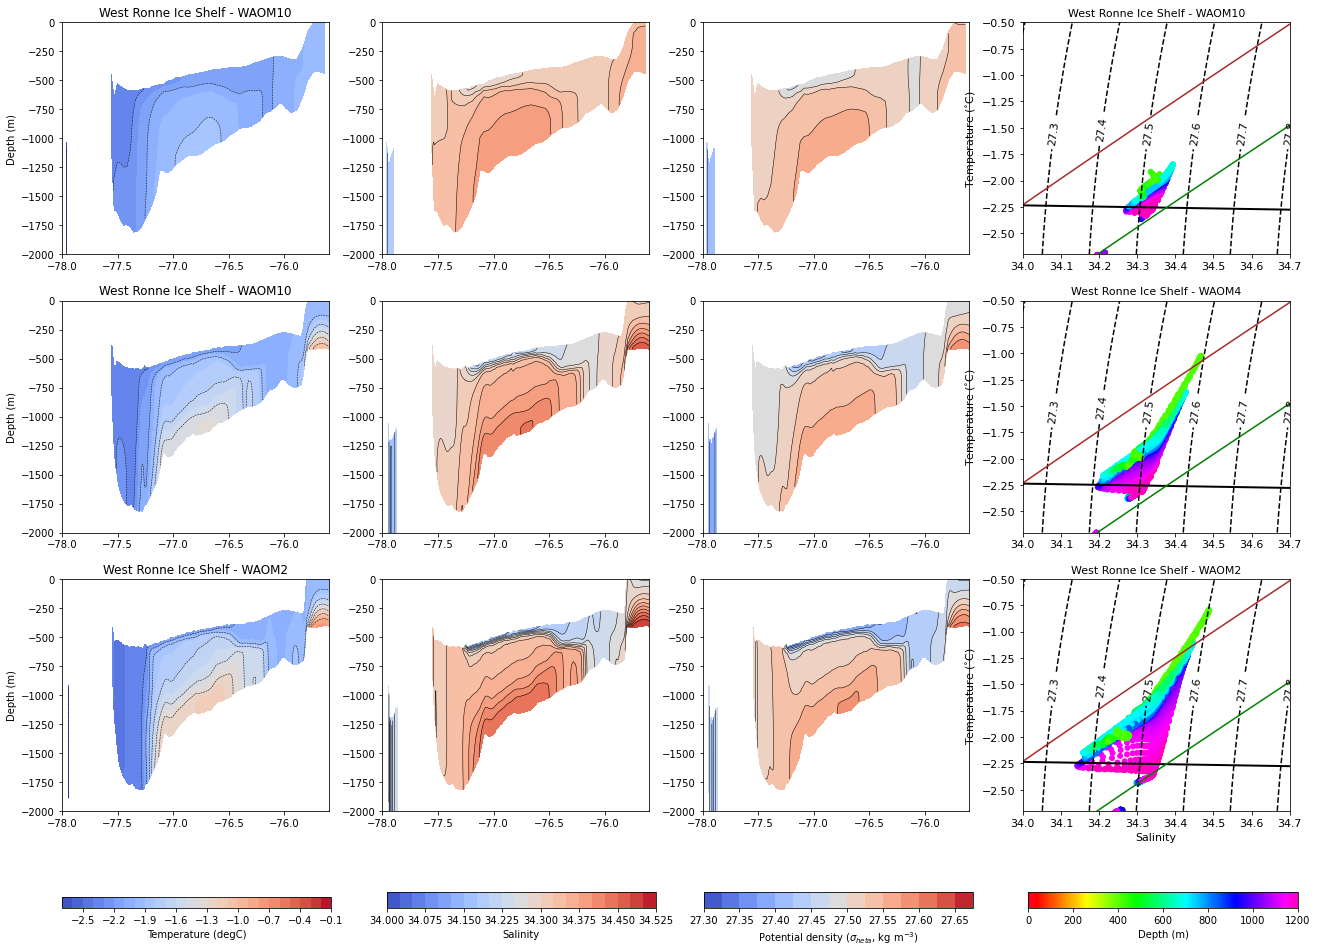

In [43]:
# fig cross-sections + ts digrams RF-RIS regions

# Plot transects
levelsT = np.arange(-2.7,0.,.1)
levelsTf = np.arange(-2.7,0.,.2)
levelsS = np.arange(34.,34.55,.025)
levelsSf = np.arange(34.,34.55,.025)
levelsR = np.arange(27.3,27.7,.025)
levelsRf = np.arange(27.3,27.7,.025)

#f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 7))
fig = plt.figure(figsize=(22,15))
ax1 = fig.add_subplot(3,4,1)
ct = plt.contourf(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(temp_WWed10), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(temp_WWed10), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM10')
plt.ylabel('Depth (m)')
# plt.xlabel('Latitude')

ax2 = fig.add_subplot(3,4,2)
#xr.DataArray.from_iris(salt_WWed10.plot(levels=levelsS)
cs = plt.contourf(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(salt_WWed10), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(salt_WWed10), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2000,0])

ax3 = fig.add_subplot(3,4,3)
cr = plt.contourf(lat_WWed10_mask, z_WWed10_mask, rho_WWed10, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed10_mask, z_WWed10_mask, rho_WWed10, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2000,0])

ax5 = fig.add_subplot(3,4,5)
ct = plt.contourf(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(temp_WWed4), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(temp_WWed4), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM10')
plt.ylabel('Depth (m)') # minus is height not depth!

ax6 = fig.add_subplot(3,4,6)
cs = plt.contourf(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(salt_WWed4), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(salt_WWed4), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2000,0])

ax7 = fig.add_subplot(3,4,7)
cr = plt.contourf(lat_WWed4_mask, z_WWed4_mask, rho_WWed4, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed4_mask, z_WWed4_mask, rho_WWed4, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2000,0])

ax9 = fig.add_subplot(3,4,9)
ct = plt.contourf(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(temp_WWed2), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(temp_WWed2), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM2')
plt.ylabel('Depth (m)')

ax10 = fig.add_subplot(3,4,10)
cs = plt.contourf(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(salt_WWed2), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(salt_WWed2), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2000,0])

ax11 = fig.add_subplot(3,4,11)
cr = plt.contourf(lat_WWed2_mask, z_WWed2_mask, rho_WWed2, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed2_mask, z_WWed2_mask, rho_WWed2, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2000,0])

cbar_ax1 = fig.add_axes([0.125, 0.06, 0.17, 0.01])
cbt = fig.colorbar(ct, cax=cbar_ax1, orientation='horizontal')#plt.colorbar(ct, extend='both')
cbt.ax.set_xlabel('Temperature (degC)')
cbar_ax2 = fig.add_axes([0.33, 0.06, 0.17, 0.015])
cbs = fig.colorbar(cs, cax=cbar_ax2, orientation='horizontal')
cbs.ax.set_xlabel('Salinity')
cbar_ax3 = fig.add_axes([0.53, 0.06, 0.17, 0.015])
cbr = fig.colorbar(cr, cax=cbar_ax3, orientation='horizontal')
cbr.ax.set_xlabel('Potential density ($\sigma_{\theta}$, kg m$^{-3}$)')

# ts-diagram
plt.subplot(3,4,4)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed10, temp_WWed10, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed10, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,-.5])
plt.title('West Ronne Ice Shelf - WAOM10', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.1),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')
plt.plot(si,Freez_tempW,'-',color='k', linewidth=2)
plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,4,8)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed4, temp_WWed4, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed4, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,-.5])
plt.title('West Ronne Ice Shelf - WAOM4', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.1),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')
plt.plot(si,Freez_tempW,'-',color='k', linewidth=2)
plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,4,12)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed2, temp_WWed2, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed2, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlabel('Salinity', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,-.5])
plt.title('West Ronne Ice Shelf - WAOM2', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.1),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')
plt.plot(si,Freez_tempW,'-',color='k', linewidth=2)
plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

cbar_ax4 = fig.add_axes([0.735, 0.06, 0.17, 0.015])
cbts = fig.colorbar(scat, cax=cbar_ax4, orientation='horizontal')
cbts.ax.set_xlabel('Depth (m)')

fig_path='/users/boeiradi/COLD_project/postprocessing/figs/TS_diagrams/'
name_fig="waom10x4x2extend_shflim_S_0.25Q_RFISsectionW+TSdiag_iceshelf.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

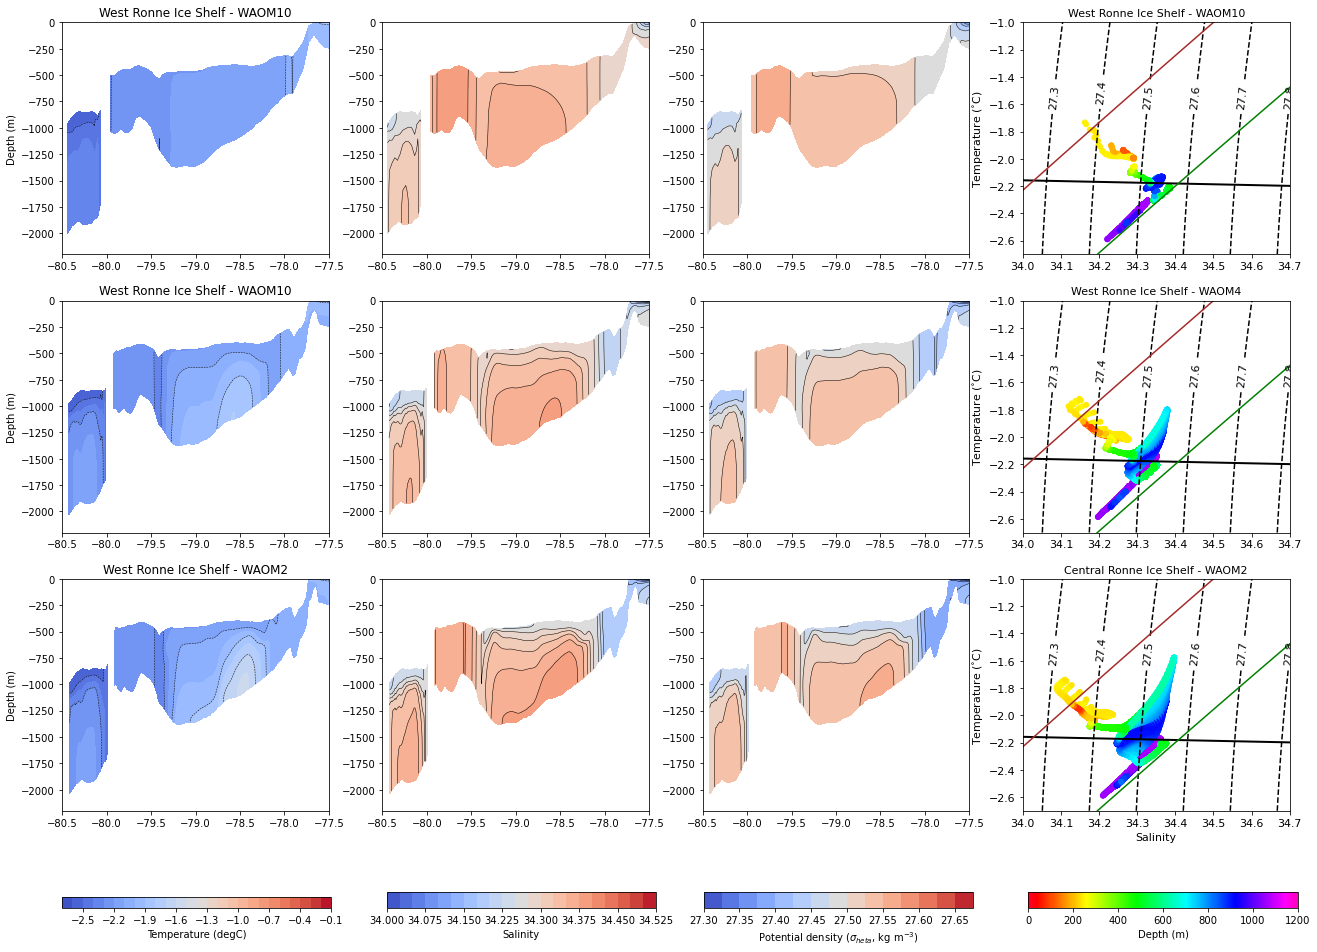

In [44]:
# fig cross-sections + ts digrams RF-RIS regions

#f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 7))
fig = plt.figure(figsize=(22,15))
ax1 = fig.add_subplot(3,4,1)
ct = plt.contourf(lat_EWed10_mask, z_EWed10_mask, xr.DataArray.from_iris(temp_EWed10), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed10_mask, z_EWed10_mask, xr.DataArray.from_iris(temp_EWed10), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])
plt.title('West Ronne Ice Shelf - WAOM10')
plt.ylabel('Depth (m)')
# plt.xlabel('Latitude')

ax2 = fig.add_subplot(3,4,2)
#xr.DataArray.from_iris(salt_EWed10.plot(levels=levelsS)
cs = plt.contourf(lat_EWed10_mask, z_EWed10_mask, xr.DataArray.from_iris(salt_EWed10), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_EWed10_mask, z_EWed10_mask, xr.DataArray.from_iris(salt_EWed10), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])

ax3 = fig.add_subplot(3,4,3)
cr = plt.contourf(lat_EWed10_mask, z_EWed10_mask, rho_EWed10, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed10_mask, z_EWed10_mask, rho_EWed10, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])

ax5 = fig.add_subplot(3,4,5)
ct = plt.contourf(lat_EWed4_mask, z_EWed4_mask, xr.DataArray.from_iris(temp_EWed4), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed4_mask, z_EWed4_mask, xr.DataArray.from_iris(temp_EWed4), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])
plt.title('West Ronne Ice Shelf - WAOM10')
plt.ylabel('Depth (m)') # minus is height not depth!

ax6 = fig.add_subplot(3,4,6)
cs = plt.contourf(lat_EWed4_mask, z_EWed4_mask, xr.DataArray.from_iris(salt_EWed4), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_EWed4_mask, z_EWed4_mask, xr.DataArray.from_iris(salt_EWed4), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])

ax7 = fig.add_subplot(3,4,7)
cr = plt.contourf(lat_EWed4_mask, z_EWed4_mask, rho_EWed4, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed4_mask, z_EWed4_mask, rho_EWed4, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])

ax9 = fig.add_subplot(3,4,9)
ct = plt.contourf(lat_EWed2_mask, z_EWed2_mask, xr.DataArray.from_iris(temp_EWed2), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed2_mask, z_EWed2_mask, xr.DataArray.from_iris(temp_EWed2), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])
plt.title('West Ronne Ice Shelf - WAOM2')
plt.ylabel('Depth (m)')

ax10 = fig.add_subplot(3,4,10)
cs = plt.contourf(lat_EWed2_mask, z_EWed2_mask, xr.DataArray.from_iris(salt_EWed2), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_EWed2_mask, z_EWed2_mask, xr.DataArray.from_iris(salt_EWed2), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])

ax11 = fig.add_subplot(3,4,11)
cr = plt.contourf(lat_EWed2_mask, z_EWed2_mask, rho_EWed2, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed2_mask, z_EWed2_mask, rho_EWed2, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])

cbar_ax1 = fig.add_axes([0.125, 0.06, 0.17, 0.01])
cbt = fig.colorbar(ct, cax=cbar_ax1, orientation='horizontal')#plt.colorbar(ct, extend='both')
cbt.ax.set_xlabel('Temperature (degC)')
cbar_ax2 = fig.add_axes([0.33, 0.06, 0.17, 0.015])
cbs = fig.colorbar(cs, cax=cbar_ax2, orientation='horizontal')
cbs.ax.set_xlabel('Salinity')
cbar_ax3 = fig.add_axes([0.53, 0.06, 0.17, 0.015])
cbr = fig.colorbar(cr, cax=cbar_ax3, orientation='horizontal')
cbr.ax.set_xlabel('Potential density ($\sigma_{\theta}$, kg m$^{-3}$)')

# ts-diagram
plt.subplot(3,4,4)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_EWed10, temp_EWed10, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_EWed10, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,-1])
plt.title('West Ronne Ice Shelf - WAOM10', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.1),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,4,8)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_EWed4, temp_EWed4, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_EWed4, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,-1])
plt.title('West Ronne Ice Shelf - WAOM4', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.1),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,4,12)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_EWed2, temp_EWed2, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_EWed2, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlabel('Salinity', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,-1])
plt.title('Central Ronne Ice Shelf - WAOM2', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.1),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

cbar_ax4 = fig.add_axes([0.735, 0.06, 0.17, 0.015])
cbts = fig.colorbar(scat, cax=cbar_ax4, orientation='horizontal')
cbts.ax.set_xlabel('Depth (m)')

fig_path='/users/boeiradi/COLD_project/postprocessing/figs/TS_diagrams/'
name_fig="waom10x4x2extend_shflim_S_0.25Q_RFISsectionE+TSdiag_iceshelf.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

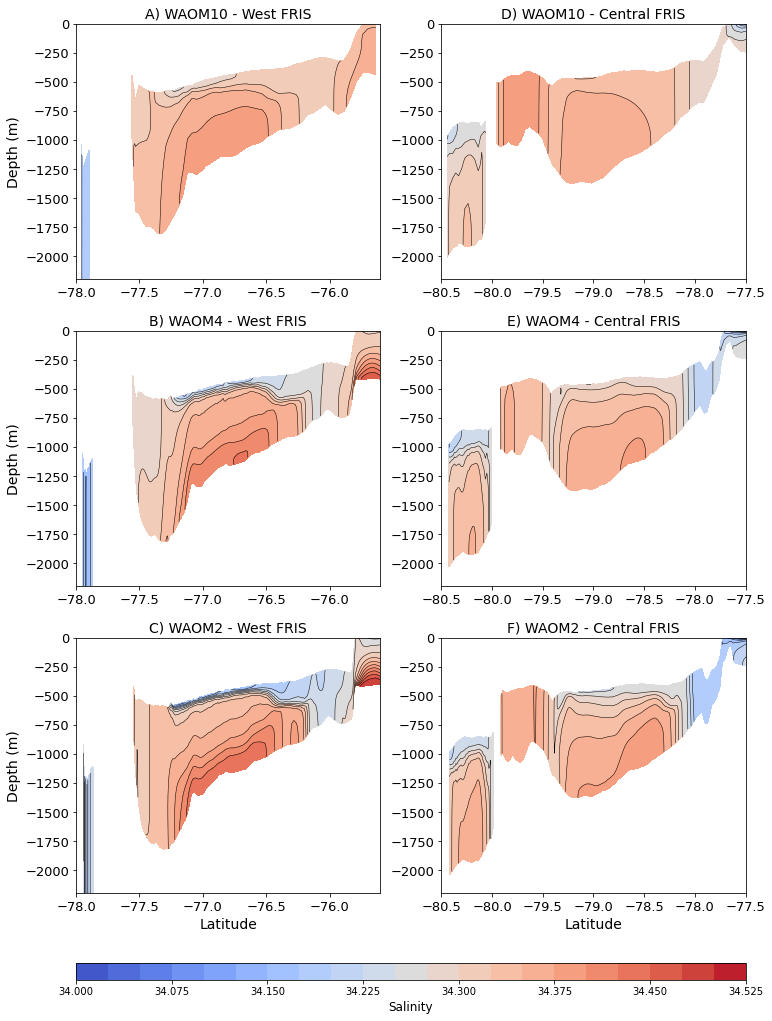

In [38]:
# fig cross-sections + ts digrams RF-RIS regions

fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(3,2,1)
#xr.DataArray.from_iris(salt_WWed10.plot(levels=levelsS)
cs = plt.contourf(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(salt_WWed10), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(salt_WWed10), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2200,0])
plt.title('A) WAOM10 - West FRIS', fontsize=14)
plt.ylabel('Depth (m)',fontsize=14)
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(-78., -75.66, step=0.5))
ax = plt.gca()
ax.tick_params(labelsize=13)

ax5 = fig.add_subplot(3,2,3)
cs = plt.contourf(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(salt_WWed4), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(salt_WWed4), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2200,0])
plt.title('B) WAOM4 - West FRIS', fontsize=14)
plt.ylabel('Depth (m)',fontsize=14)
plt.xticks(np.arange(-78., -75.6, step=0.5))
ax = plt.gca()
ax.tick_params(labelsize=13)

ax9 = fig.add_subplot(3,2,5)
cs = plt.contourf(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(salt_WWed2), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(salt_WWed2), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.,-75.6])
plt.ylim([-2200,0])
plt.title('C) WAOM2 - West FRIS', fontsize=14)
plt.ylabel('Depth (m)',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.xticks(np.arange(-78., -75.6, step=0.5))
ax = plt.gca()
ax.tick_params(labelsize=13)

ax3 = fig.add_subplot(3,2,2)
#xr.DataArray.from_iris(salt_EWed10.plot(levels=levelsS)
cs = plt.contourf(lat_EWed10_mask, z_EWed10_mask, xr.DataArray.from_iris(salt_EWed10), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_EWed10_mask, z_EWed10_mask, xr.DataArray.from_iris(salt_EWed10), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])
plt.title('D) WAOM10 - Central FRIS', fontsize=14)
ax = plt.gca()
ax.tick_params(labelsize=13)

ax7 = fig.add_subplot(3,2,4)
cs = plt.contourf(lat_EWed4_mask, z_EWed4_mask, xr.DataArray.from_iris(salt_EWed4), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_EWed4_mask, z_EWed4_mask, xr.DataArray.from_iris(salt_EWed4), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])
plt.title('E) WAOM4 - Central FRIS', fontsize=14)
ax = plt.gca()
ax.tick_params(labelsize=13)

ax11 = fig.add_subplot(3,2,6)
cs = plt.contourf(lat_EWed2_mask, z_EWed2_mask, xr.DataArray.from_iris(salt_EWed2), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_EWed2_mask, z_EWed2_mask, xr.DataArray.from_iris(salt_EWed2), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-80.5,-77.5])
plt.ylim([-2200,0])
plt.title('F) WAOM2 - Central FRIS', fontsize=14)
plt.xlabel('Latitude',fontsize=14)
ax = plt.gca()
ax.tick_params(labelsize=13)

cbar_ax1 = fig.add_axes([0.125, 0.05, 0.775, 0.015])
cbs = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal')
cbs.ax.set_xlabel('Salinity',fontsize=12)

fig_path='/users/boeiradi/COLD_project/postprocessing/figs/TS_diagrams/'
name_fig="waom10x4x2extend_shflim_S_0.25Q_RFISsections_iceshelf.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()



/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: No contour levels were found within the data range.
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iri

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: No contour levels were found within the data range.


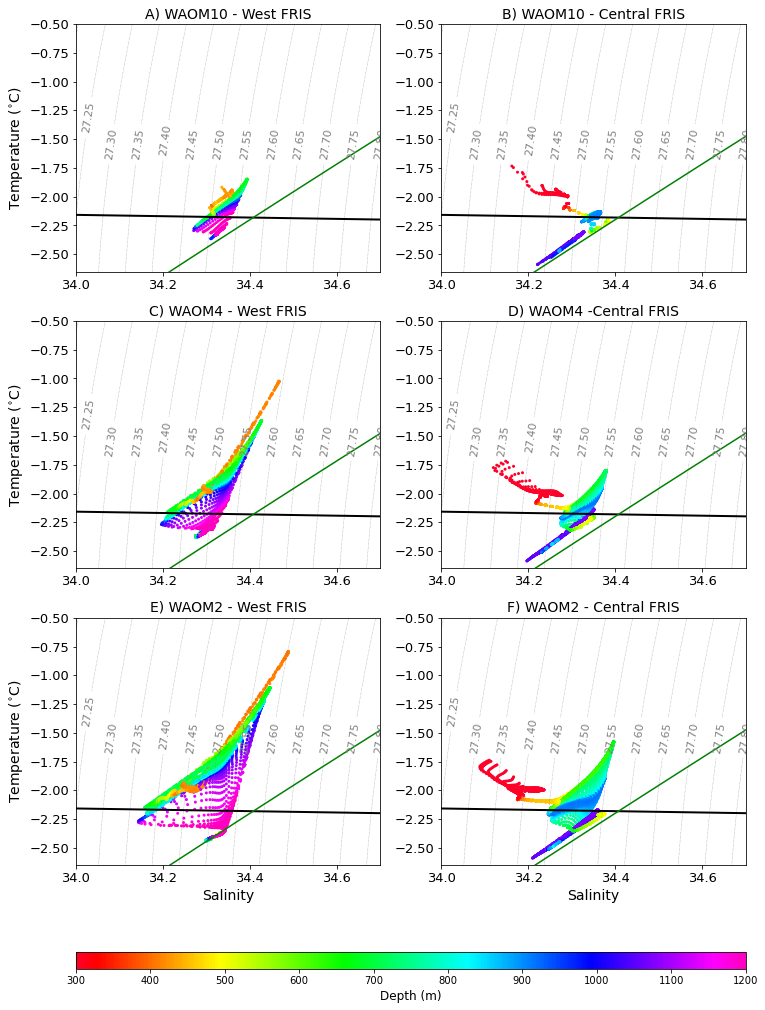

In [11]:
# ts-diagram
fig = plt.figure(figsize=(12,16))

plt.subplot(3,2,1)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed10, temp_WWed10, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed10, marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=14)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('A) WAOM10 - West FRIS', fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,2,3)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed4, temp_WWed4, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed4, marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=14)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('C) WAOM4 - West FRIS', fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,2,5)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed2, temp_WWed2, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed2, marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=14)
ax.set_xlabel('Salinity',fontsize=14)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('E) WAOM2 - West FRIS', fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,2,2)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_EWed10, temp_EWed10, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_EWed10, marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
# ax.set_ylabel('Temperature ($^{\circ}$C)')
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('B) WAOM10 - Central FRIS', fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,2,4)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_EWed4, temp_EWed4, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_EWed4, marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
# ax.set_ylabel('Temperature ($^{\circ}$C)')
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('D) WAOM4 -Central FRIS', fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,2,6)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_EWed2, temp_EWed2, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_EWed2, marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
# ax.set_ylabel('Temperature ($^{\circ}$C)')
# ax.set_xlabel('Salinity',fontsize=12)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('F) WAOM2 - Central FRIS', fontsize=14)
ax.set_xlabel('Salinity',fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

cbar_ax2 = fig.add_axes([0.125, 0.06, 0.775, 0.015])
cbts = fig.colorbar(scat, cax=cbar_ax2, orientation='horizontal')
cbts.ax.set_xlabel('Depth (m)',fontsize=12)

fig_path='/users/boeiradi/COLD_project/postprocessing/figs/TS_diagrams/'
name_fig="waom10x4x2extend_shflim_S_0.25Q_RFIS_TSdiag_iceshelf.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

In [12]:
## ndays = [31,28,31,30,31,30,31,31,30,31,30,31]

tind_ini = np.empty(12)
tind_end = np.empty(12)

for mm in np.arange(0,12):
    if mm == 0:
        tind_ini[mm] = 0
        tind_end[mm] = 6
    elif mm == 11:
        tind_ini[mm] = tind_end[mm-1]+1
        tind_end[mm] = tind_ini[mm]+6   
    else:
        tind_ini[mm] = tind_end[mm-1]+1
        tind_end[mm] = tind_ini[mm]+5
        
print(tind_ini, tind_end)

[ 0.  7. 13. 19. 25. 31. 37. 43. 49. 55. 61. 67.] [ 6. 12. 18. 24. 30. 36. 42. 48. 54. 60. 66. 73.]


In [13]:
print(salt_EWed2_tmp.shape)

(72, 31, 320)


0 0 6


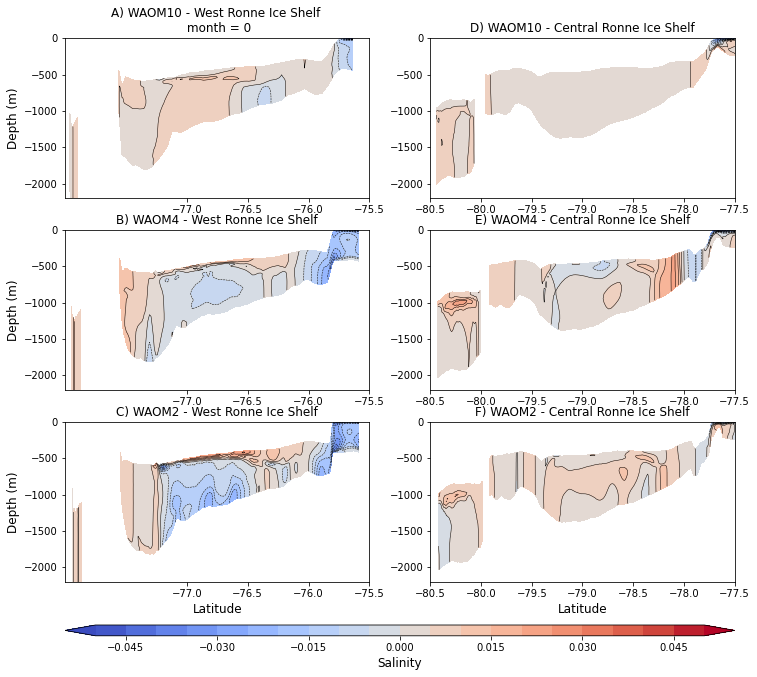

1 7 12


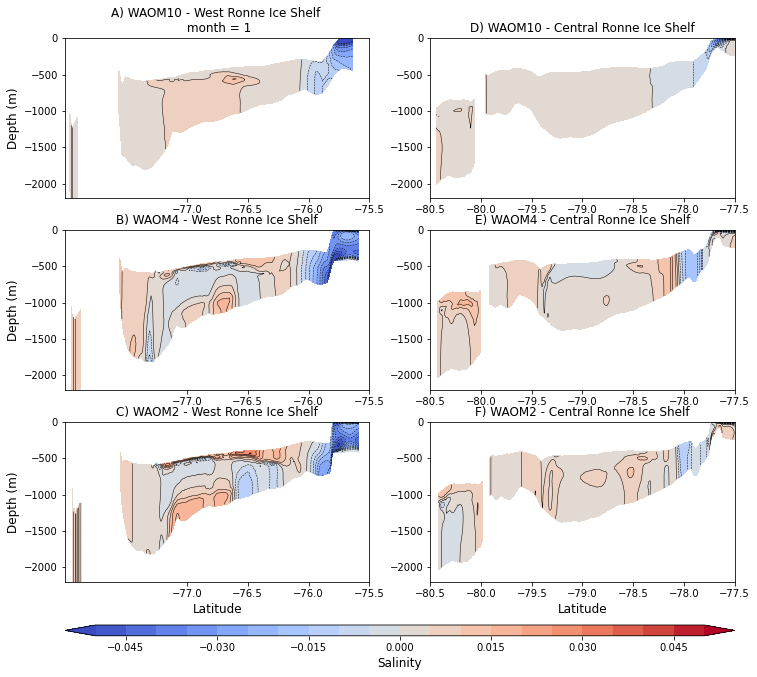

2 13 18


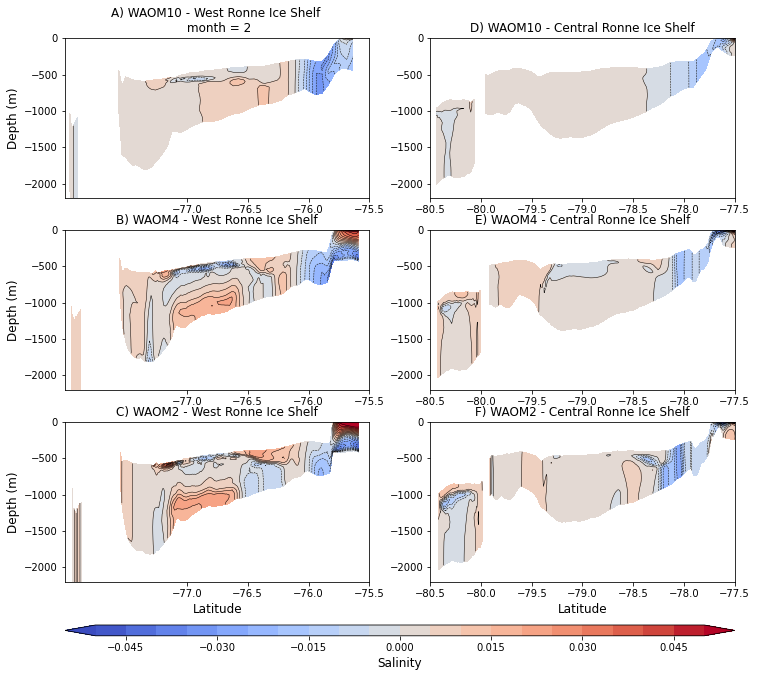

3 19 24


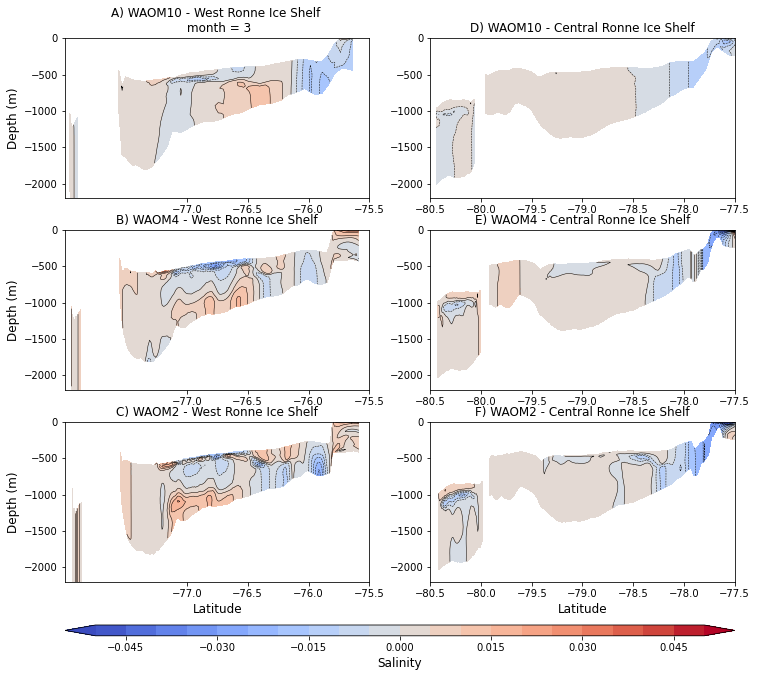

4 25 30


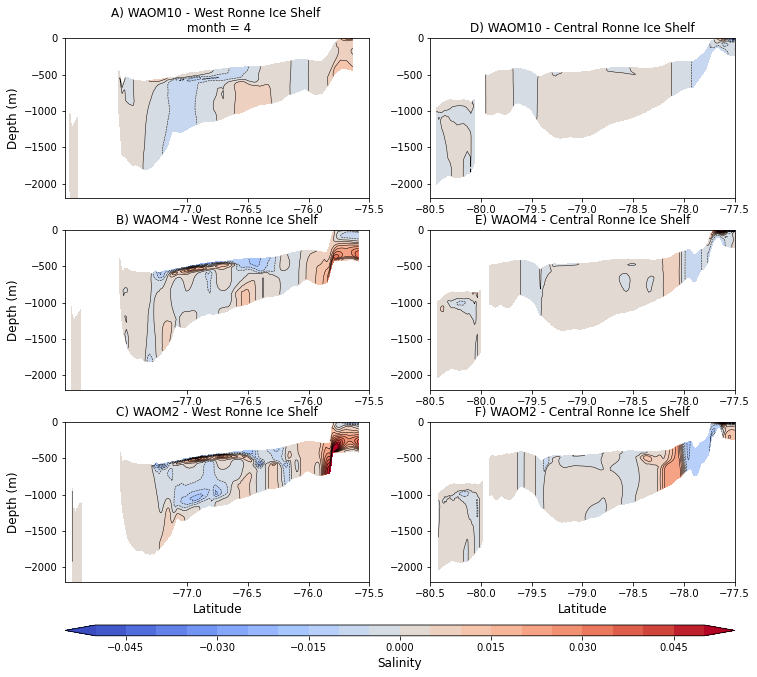

5 31 36


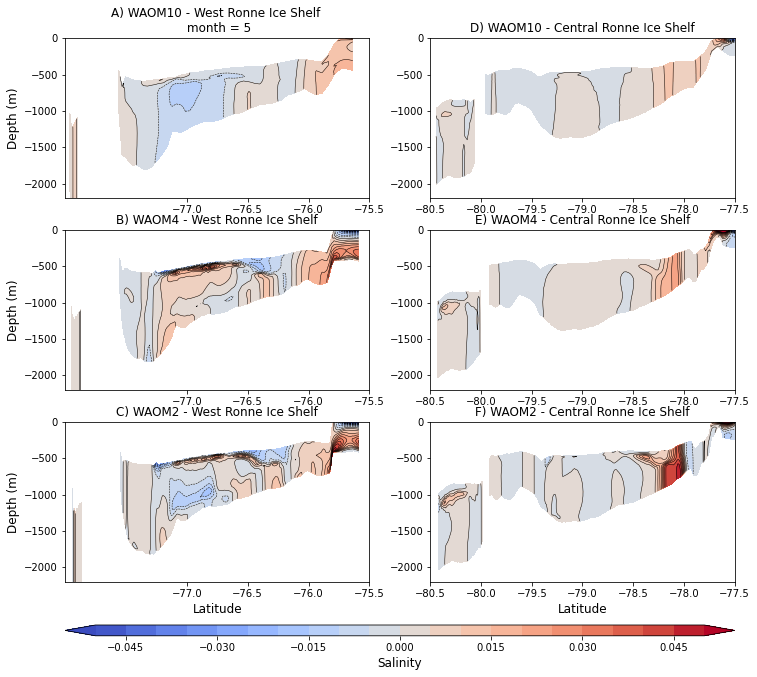

6 37 42


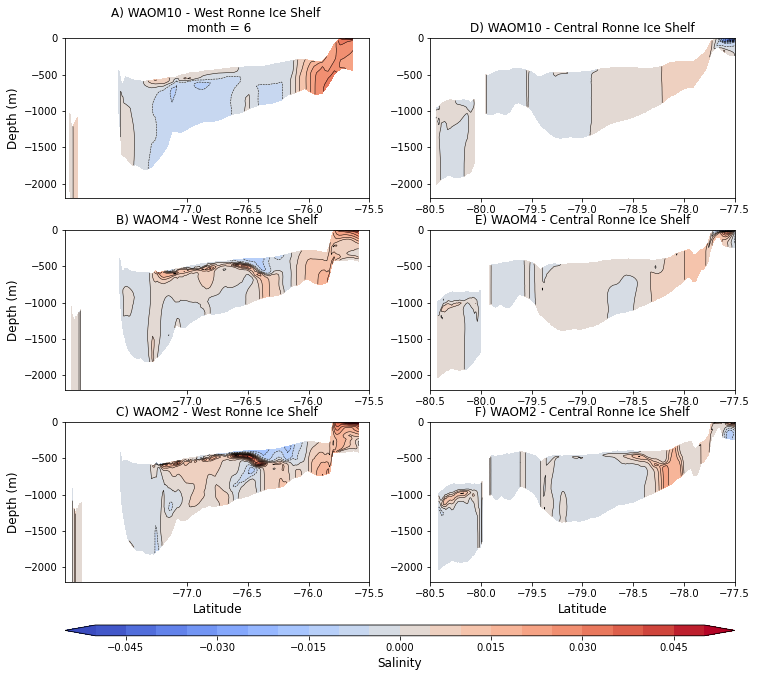

7 43 48


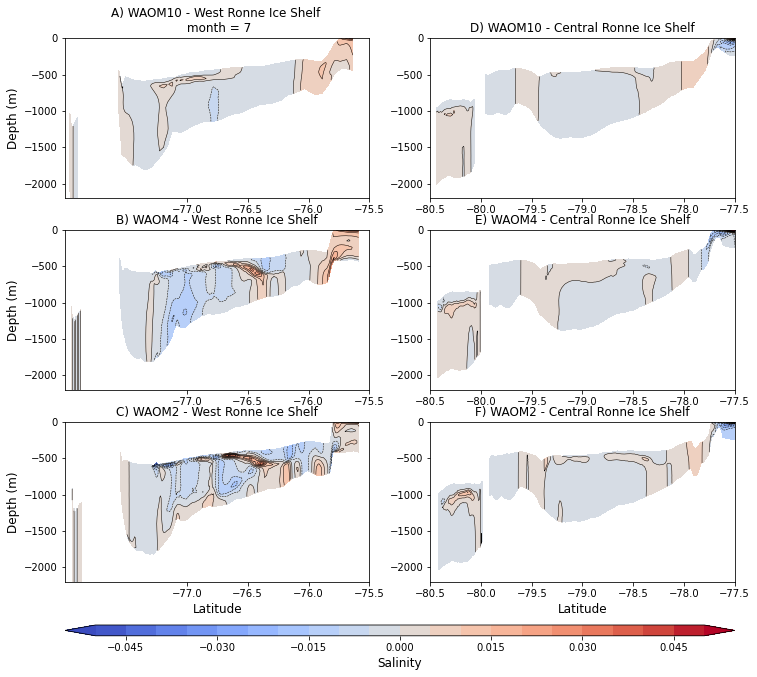

8 49 54


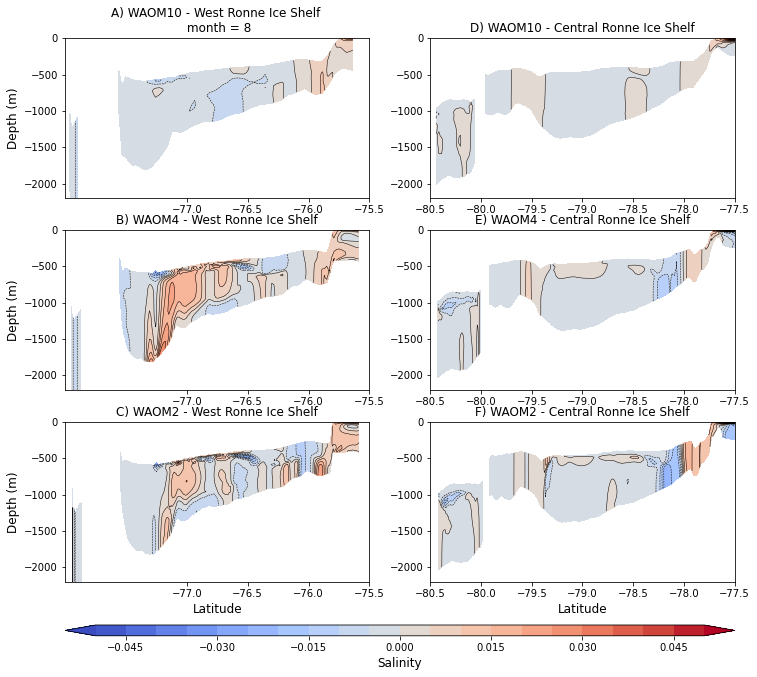

9 55 60


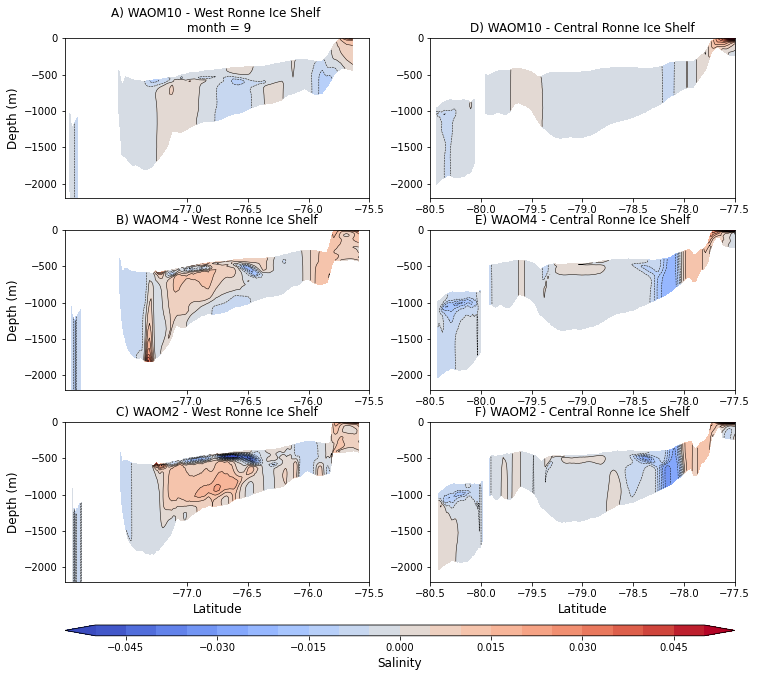

10 61 66


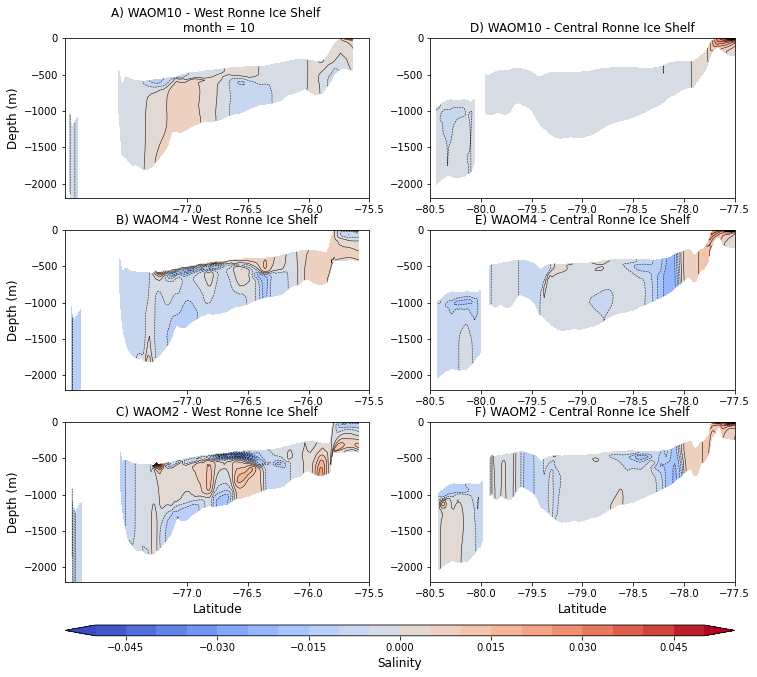

11 67 73


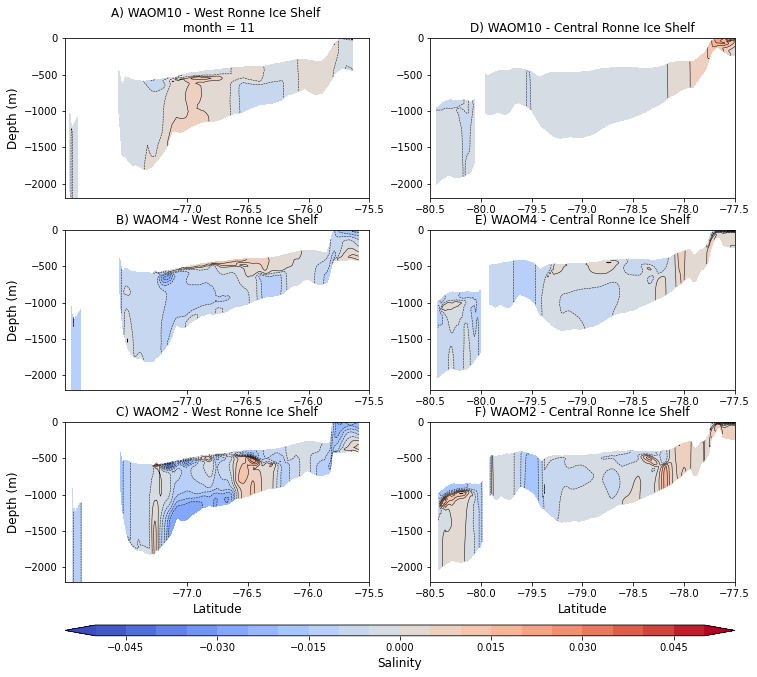

In [39]:
# fig cross-sections + ts digrams RF-RIS regions: MONTHLY anomalies

levelsS = np.arange(-.05,.055,.005)
levelsSf = np.arange(-.05,.055,.005)

salt_WWed10_xr = xr.DataArray.from_iris(salt_WWed10_tmp)
salt_WWed10_avg = salt_WWed10_xr.mean('ocean_time')
salt_WWed4_xr = xr.DataArray.from_iris(salt_WWed4_tmp)
salt_WWed4_avg = salt_WWed4_xr.mean('ocean_time')
salt_WWed2_xr = xr.DataArray.from_iris(salt_WWed2_tmp)
salt_WWed2_avg = salt_WWed2_xr.mean('ocean_time')
salt_EWed10_xr = xr.DataArray.from_iris(salt_EWed10_tmp)
salt_EWed10_avg = salt_EWed10_xr.mean('ocean_time')
salt_EWed4_xr = xr.DataArray.from_iris(salt_EWed4_tmp)
salt_EWed4_avg = salt_EWed4_xr.mean('ocean_time')
salt_EWed2_xr = xr.DataArray.from_iris(salt_EWed2_tmp)
salt_EWed2_avg = salt_EWed2_xr.mean('ocean_time')

for mm in np.arange(0,12):
    print(mm,int(tind_ini[mm]),int(tind_end[mm]))
    ti = int(tind_ini[mm])
    te = int(tind_end[mm]) 
    
    # calculate monthly anomalies:
    salt_WWed10_mm = salt_WWed10_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    salt_WWed10_diff = salt_WWed10_mm-salt_WWed10_avg
    salt_WWed4_mm = salt_WWed4_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    salt_WWed4_diff = salt_WWed4_mm-salt_WWed4_avg
    salt_WWed2_mm = salt_WWed2_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    salt_WWed2_diff = salt_WWed2_mm-salt_WWed2_avg
    
    salt_EWed10_mm = salt_EWed10_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    salt_EWed10_diff = salt_EWed10_mm-salt_EWed10_avg
    salt_EWed4_mm = salt_EWed4_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    salt_EWed4_diff = salt_EWed4_mm-salt_EWed4_avg
    salt_EWed2_mm = salt_EWed2_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    salt_EWed2_diff = salt_EWed2_mm-salt_EWed2_avg
    
    fig = plt.figure(figsize=(12,10))

    ax1 = fig.add_subplot(3,2,1)
    cs = plt.contourf(lat_WWed10_mask, z_WWed10_mask, salt_WWed10_diff, levels=levelsS, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_WWed10_mask, z_WWed10_mask, salt_WWed10_diff, levels=levelsSf, colors='k', linewidths=.5)
    plt.xlim([-78.,-75.6])
    plt.ylim([-2200,0])
    plt.title('A) WAOM10 - West Ronne Ice Shelf \n month = ' + str(mm))
    plt.ylabel('Depth (m)',fontsize=12)
    locs, labels = plt.xticks()  # Get the current locations and labels.
    plt.xticks(np.arange(-77., -75., step=0.5))

    ax5 = fig.add_subplot(3,2,3)
    cs = plt.contourf(lat_WWed4_mask, z_WWed4_mask, salt_WWed4_diff, levels=levelsS, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_WWed4_mask, z_WWed4_mask, salt_WWed4_diff, levels=levelsSf, colors='k', linewidths=.5)
    plt.xlim([-78.,-75.6])
    plt.ylim([-2200,0])
    plt.title('B) WAOM4 - West Ronne Ice Shelf')
    plt.ylabel('Depth (m)',fontsize=12)
    plt.xticks(np.arange(-77., -75., step=0.5))

    ax9 = fig.add_subplot(3,2,5)
    cs = plt.contourf(lat_WWed2_mask, z_WWed2_mask, salt_WWed2_diff, levels=levelsS, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_WWed2_mask, z_WWed2_mask, salt_WWed2_diff, levels=levelsSf, colors='k', linewidths=.5)
    plt.xlim([-78.,-75.6])
    plt.ylim([-2200,0])
    plt.title('C) WAOM2 - West Ronne Ice Shelf')
    plt.ylabel('Depth (m)',fontsize=12)
    plt.xlabel('Latitude',fontsize=12)
    plt.xticks(np.arange(-77., -75., step=0.5))

    ax3 = fig.add_subplot(3,2,2)
    cs = plt.contourf(lat_EWed10_mask, z_EWed10_mask, salt_EWed10_diff, levels=levelsS, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_EWed10_mask, z_EWed10_mask, salt_EWed10_diff, levels=levelsSf, colors='k', linewidths=.5)
    plt.xlim([-80.5,-77.5])
    plt.ylim([-2200,0])
    plt.title('D) WAOM10 - Central Ronne Ice Shelf')

    ax7 = fig.add_subplot(3,2,4)
    cs = plt.contourf(lat_EWed4_mask, z_EWed4_mask, salt_EWed4_diff, levels=levelsS, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_EWed4_mask, z_EWed4_mask, salt_EWed4_diff, levels=levelsSf, colors='k', linewidths=.5)
    plt.xlim([-80.5,-77.5])
    plt.ylim([-2200,0])
    plt.title('E) WAOM4 - Central Ronne Ice Shelf')

    ax11 = fig.add_subplot(3,2,6)
    cs = plt.contourf(lat_EWed2_mask, z_EWed2_mask, salt_EWed2_diff, levels=levelsS, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_EWed2_mask, z_EWed2_mask, salt_EWed2_diff, levels=levelsSf, colors='k', linewidths=.5)
    plt.xlim([-80.5,-77.5])
    plt.ylim([-2200,0])
    plt.title('F) WAOM2 - Central Ronne Ice Shelf')
    plt.xlabel('Latitude',fontsize=12)

    cbar_ax1 = fig.add_axes([0.125, 0.05, 0.775, 0.015])
    cbs = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal')
    cbs.ax.set_xlabel('Salinity',fontsize=12)

    fig_path='/users/boeiradi/COLD_project/postprocessing/figs/TS_diagrams/'
    name_fig="waom10x4x2extend_shflim_S_0.25Q_RFISsections_iceshelf_m" + str(mm) + ".png"
    plt.savefig(fig_path + name_fig, dpi=300)
    plt.show()



0 0 6


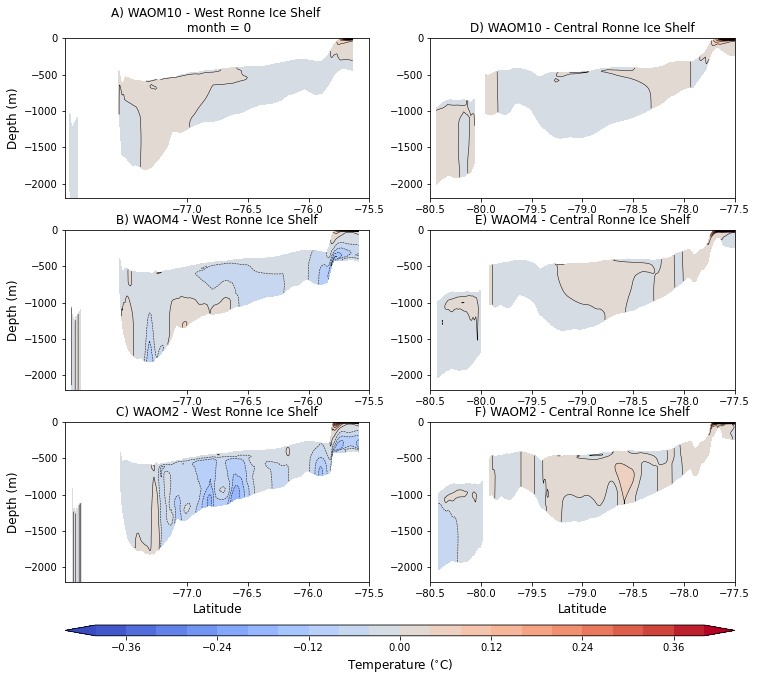

1 7 12


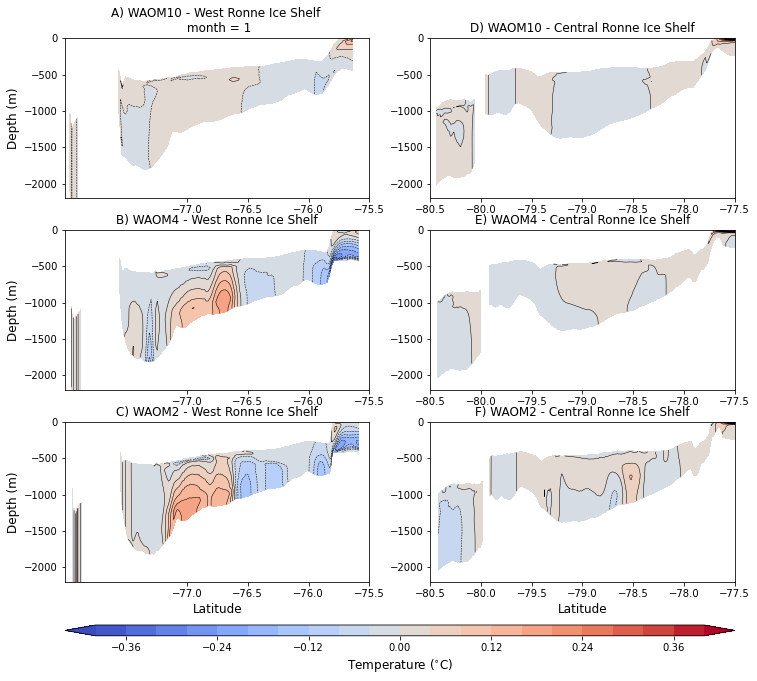

2 13 18


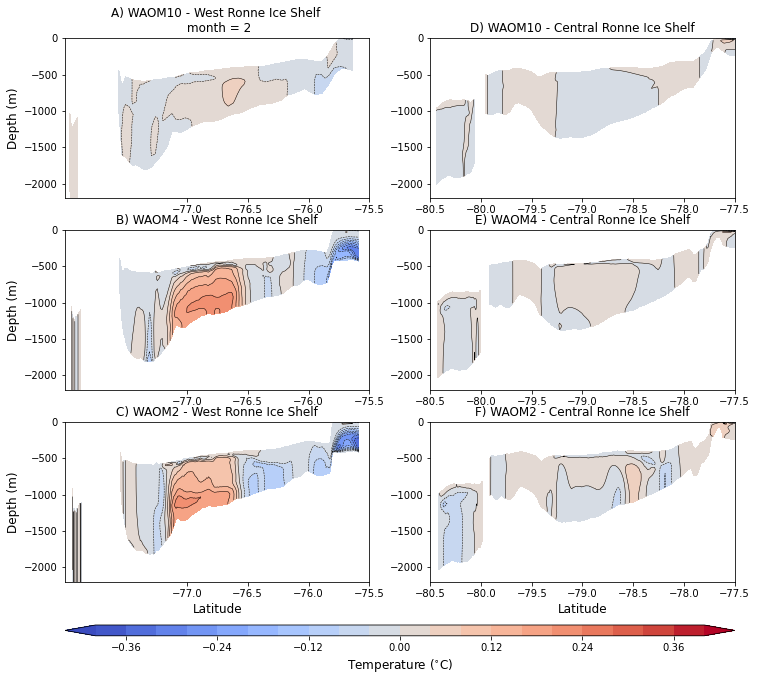

3 19 24


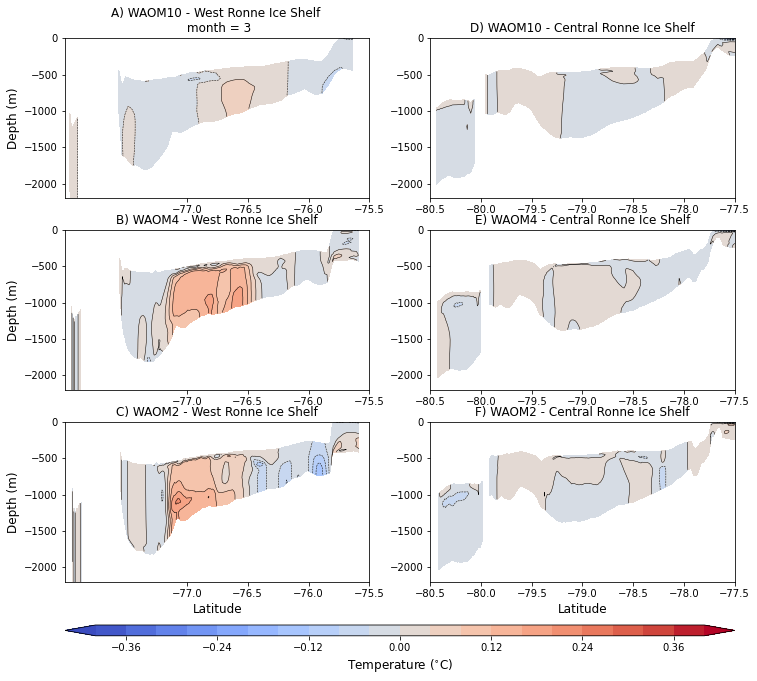

4 25 30


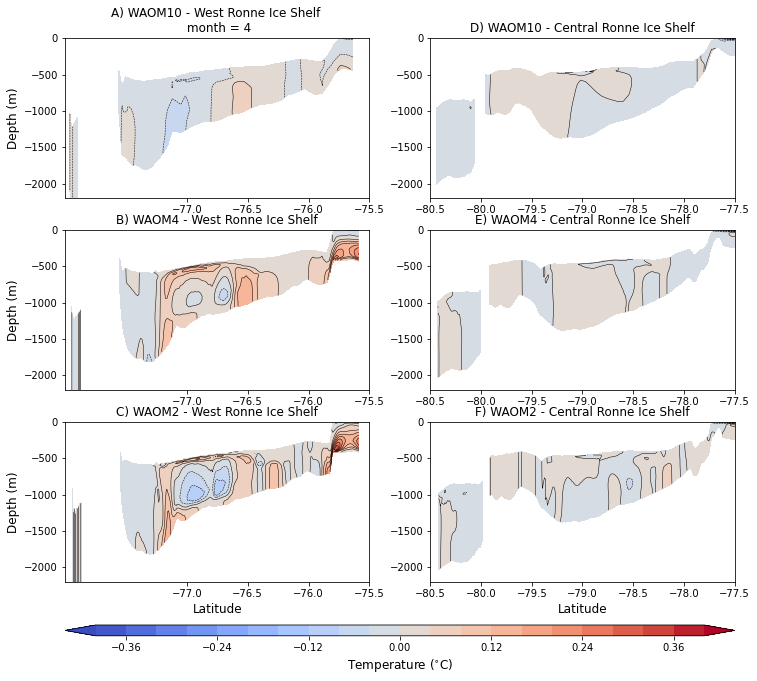

5 31 36


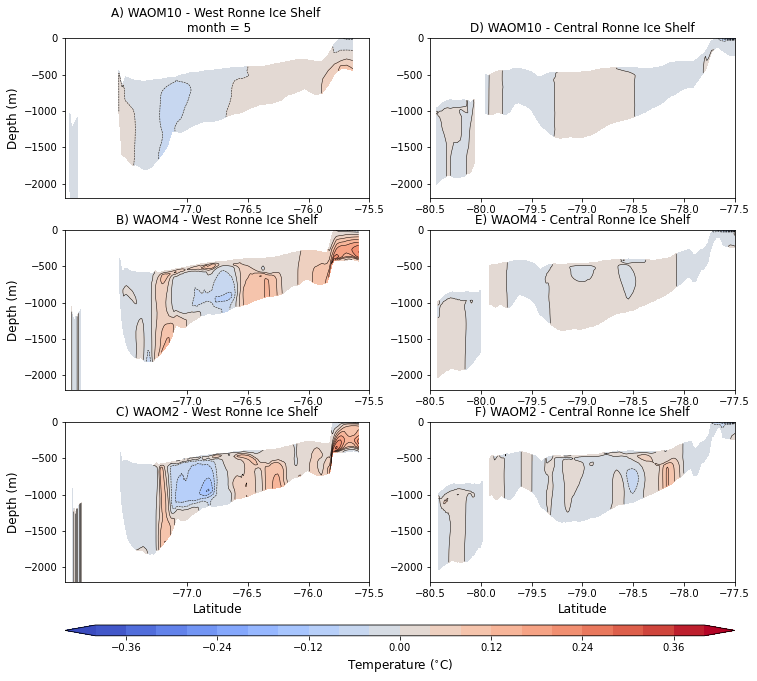

6 37 42


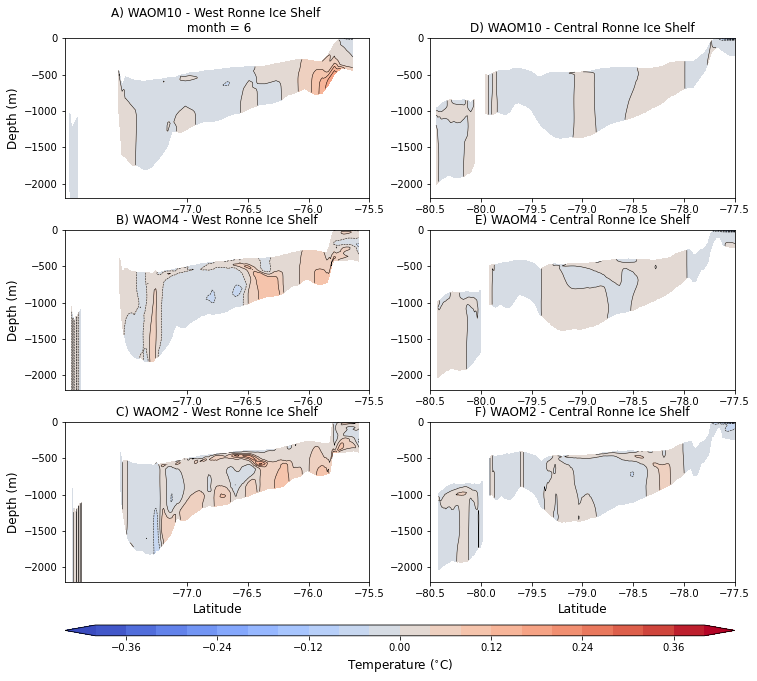

7 43 48


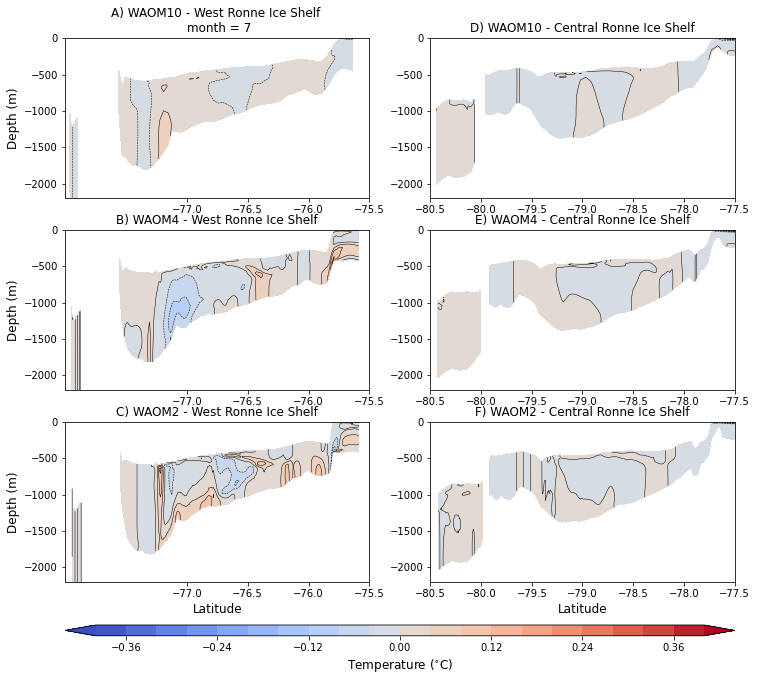

8 49 54


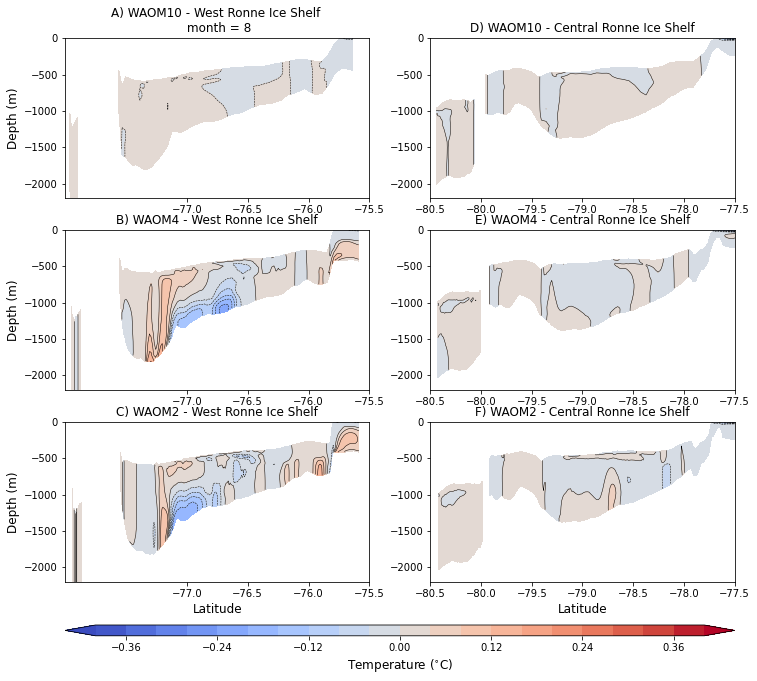

9 55 60


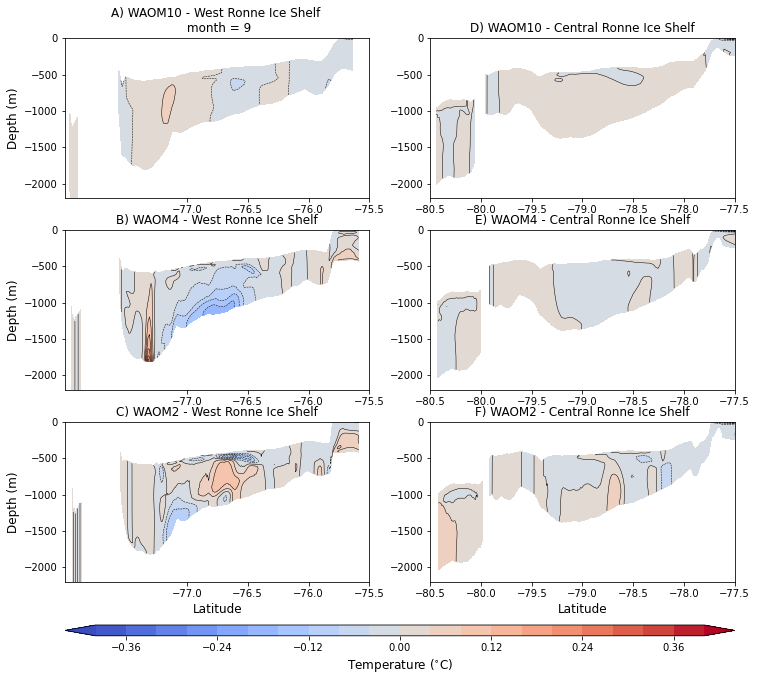

10 61 66


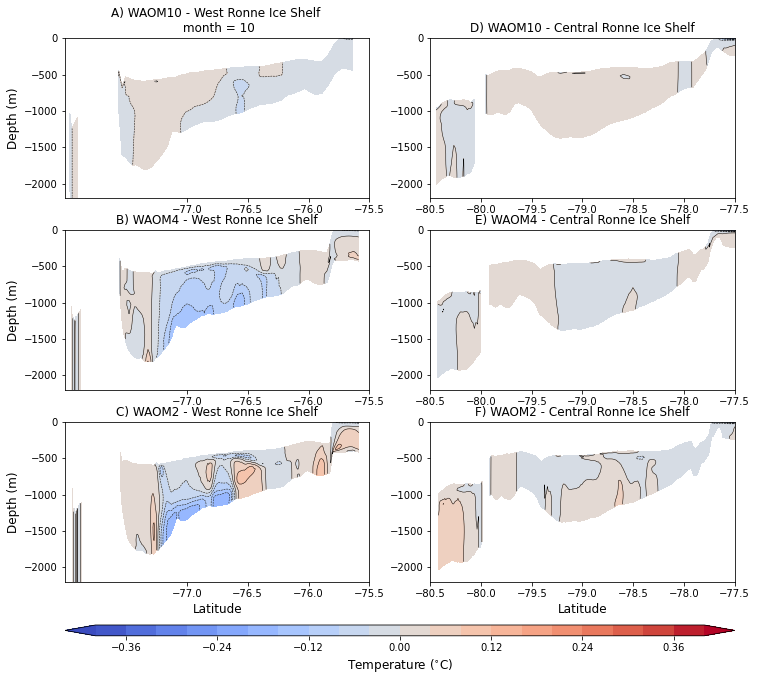

11 67 73


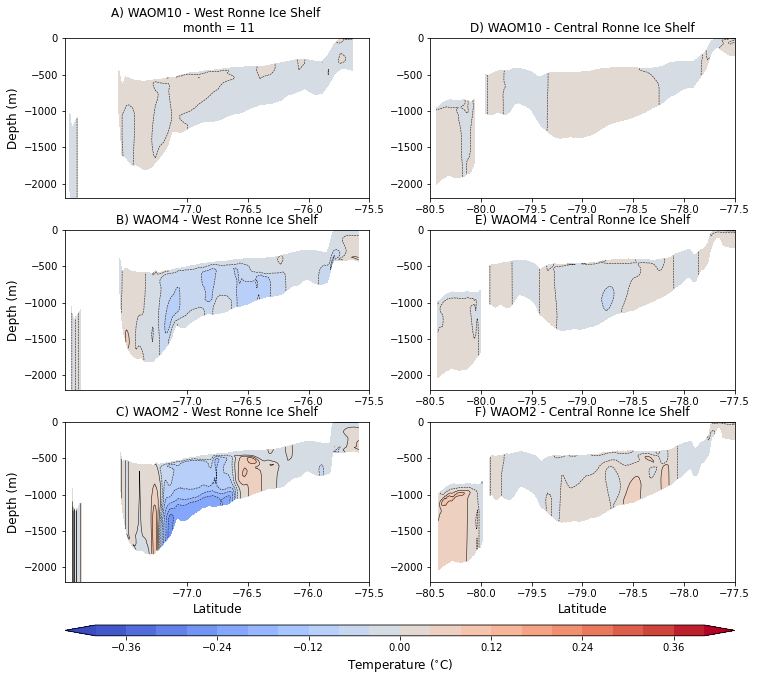

In [40]:
# fig cross-sections + ts digrams RF-RIS regions: MONTHLY anomalies

levelsT = np.arange(-.4,.44,.04)
levelsTf = np.arange(-.4,.44,.04)

temp_WWed10_xr = xr.DataArray.from_iris(temp_WWed10_tmp)
temp_WWed10_avg = temp_WWed10_xr.mean('ocean_time')
temp_WWed4_xr = xr.DataArray.from_iris(temp_WWed4_tmp)
temp_WWed4_avg = temp_WWed4_xr.mean('ocean_time')
temp_WWed2_xr = xr.DataArray.from_iris(temp_WWed2_tmp)
temp_WWed2_avg = temp_WWed2_xr.mean('ocean_time')
temp_EWed10_xr = xr.DataArray.from_iris(temp_EWed10_tmp)
temp_EWed10_avg = temp_EWed10_xr.mean('ocean_time')
temp_EWed4_xr = xr.DataArray.from_iris(temp_EWed4_tmp)
temp_EWed4_avg = temp_EWed4_xr.mean('ocean_time')
temp_EWed2_xr = xr.DataArray.from_iris(temp_EWed2_tmp)
temp_EWed2_avg = temp_EWed2_xr.mean('ocean_time')

for mm in np.arange(0,12):
    print(mm,int(tind_ini[mm]),int(tind_end[mm]))
    ti = int(tind_ini[mm])
    te = int(tind_end[mm]) 
    
    # calculate monthly anomalies:
    temp_WWed10_mm = temp_WWed10_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    temp_WWed10_diff = temp_WWed10_mm-temp_WWed10_avg
    temp_WWed4_mm = temp_WWed4_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    temp_WWed4_diff = temp_WWed4_mm-temp_WWed4_avg
#     temp_WWed2_mm = temp_WWed2_xr.isel(ocean_time=mm)
    temp_WWed2_mm = temp_WWed2_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    temp_WWed2_diff = temp_WWed2_mm-temp_WWed2_avg
    
    temp_EWed10_mm = temp_EWed10_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    temp_EWed10_diff = temp_EWed10_mm-temp_EWed10_avg
    temp_EWed4_mm = temp_EWed4_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    temp_EWed4_diff = temp_EWed4_mm-temp_EWed4_avg
#     temp_EWed2_mm = temp_EWed2_xr.isel(ocean_time=mm)
    temp_EWed2_mm = temp_EWed2_xr.isel(ocean_time=slice(ti,te)).mean('ocean_time')
    temp_EWed2_diff = temp_EWed2_mm-temp_EWed2_avg
    
    fig = plt.figure(figsize=(12,10))

    ax1 = fig.add_subplot(3,2,1)
    cs = plt.contourf(lat_WWed10_mask, z_WWed10_mask, temp_WWed10_diff, levels=levelsT, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_WWed10_mask, z_WWed10_mask, temp_WWed10_diff, levels=levelsTf, colors='k', linewidths=.5)
    plt.xlim([-78.,-75.6])
    plt.ylim([-2200,0])
    plt.title('A) WAOM10 - West Ronne Ice Shelf \n month = ' + str(mm))
    plt.ylabel('Depth (m)',fontsize=12)
    locs, labels = plt.xticks()  # Get the current locations and labels.
    plt.xticks(np.arange(-77., -75., step=0.5))

    ax5 = fig.add_subplot(3,2,3)
    cs = plt.contourf(lat_WWed4_mask, z_WWed4_mask, temp_WWed4_diff, levels=levelsT, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_WWed4_mask, z_WWed4_mask, temp_WWed4_diff, levels=levelsTf, colors='k', linewidths=.5)
    plt.xlim([-78.,-75.6])
    plt.ylim([-2200,0])
    plt.title('B) WAOM4 - West Ronne Ice Shelf')
    plt.ylabel('Depth (m)',fontsize=12)
    plt.xticks(np.arange(-77., -75., step=0.5))

    ax9 = fig.add_subplot(3,2,5)
    cs = plt.contourf(lat_WWed2_mask, z_WWed2_mask, temp_WWed2_diff, levels=levelsT, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_WWed2_mask, z_WWed2_mask, temp_WWed2_diff, levels=levelsTf, colors='k', linewidths=.5)
    plt.xlim([-78.,-75.6])
    plt.ylim([-2200,0])
    plt.title('C) WAOM2 - West Ronne Ice Shelf')
    plt.ylabel('Depth (m)',fontsize=12)
    plt.xlabel('Latitude',fontsize=12)
    plt.xticks(np.arange(-77., -75., step=0.5))

    ax3 = fig.add_subplot(3,2,2)
    cs = plt.contourf(lat_EWed10_mask, z_EWed10_mask, temp_EWed10_diff, levels=levelsT, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_EWed10_mask, z_EWed10_mask, temp_EWed10_diff, levels=levelsTf, colors='k', linewidths=.5)
    plt.xlim([-80.5,-77.5])
    plt.ylim([-2200,0])
    plt.title('D) WAOM10 - Central Ronne Ice Shelf')

    ax7 = fig.add_subplot(3,2,4)
    cs = plt.contourf(lat_EWed4_mask, z_EWed4_mask, temp_EWed4_diff, levels=levelsT, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_EWed4_mask, z_EWed4_mask, temp_EWed4_diff, levels=levelsTf, colors='k', linewidths=.5)
    plt.xlim([-80.5,-77.5])
    plt.ylim([-2200,0])
    plt.title('E) WAOM4 - Central Ronne Ice Shelf')

    ax11 = fig.add_subplot(3,2,6)
    cs = plt.contourf(lat_EWed2_mask, z_EWed2_mask, temp_EWed2_diff, levels=levelsT, cmap=plt.cm.coolwarm, extend='both')
    plt.contour(lat_EWed2_mask, z_EWed2_mask, temp_EWed2_diff, levels=levelsTf, colors='k', linewidths=.5)
    plt.xlim([-80.5,-77.5])
    plt.ylim([-2200,0])
    plt.title('F) WAOM2 - Central Ronne Ice Shelf')
    plt.xlabel('Latitude',fontsize=12)

    cbar_ax1 = fig.add_axes([0.125, 0.05, 0.775, 0.015])
    cbs = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal')
    cbs.ax.set_xlabel('Temperature ($^{\circ}$C)',fontsize=12)

    fig_path='/users/boeiradi/COLD_project/postprocessing/figs/TS_diagrams/'
    name_fig="waom10x4x2extend_shflim_S_0.25Q_RFISsections_temp_iceshelf_m" + str(mm) + ".png"
    plt.savefig(fig_path + name_fig, dpi=300)
    plt.show()



0 0 6


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

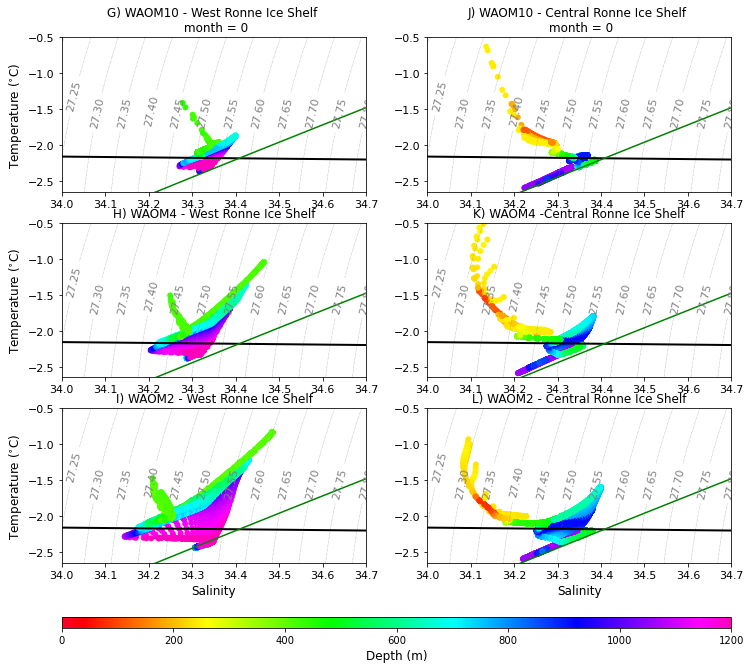

1 7 12


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:139: UserWarning: No contour levels were found within the data range.


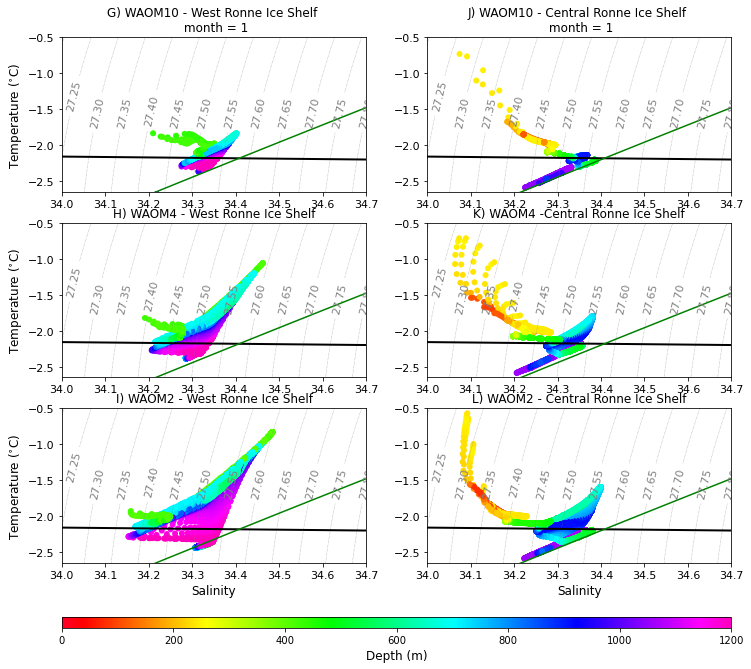

2 13 18


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

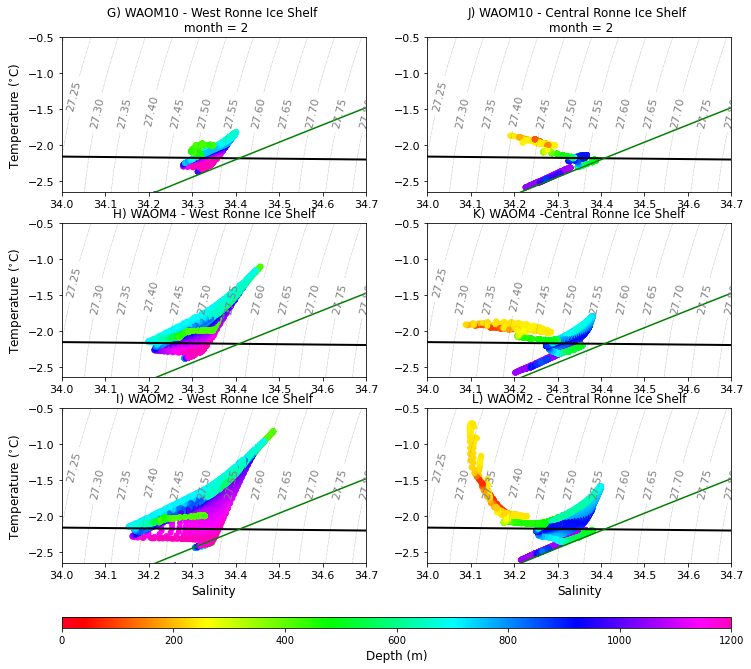

3 19 24


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

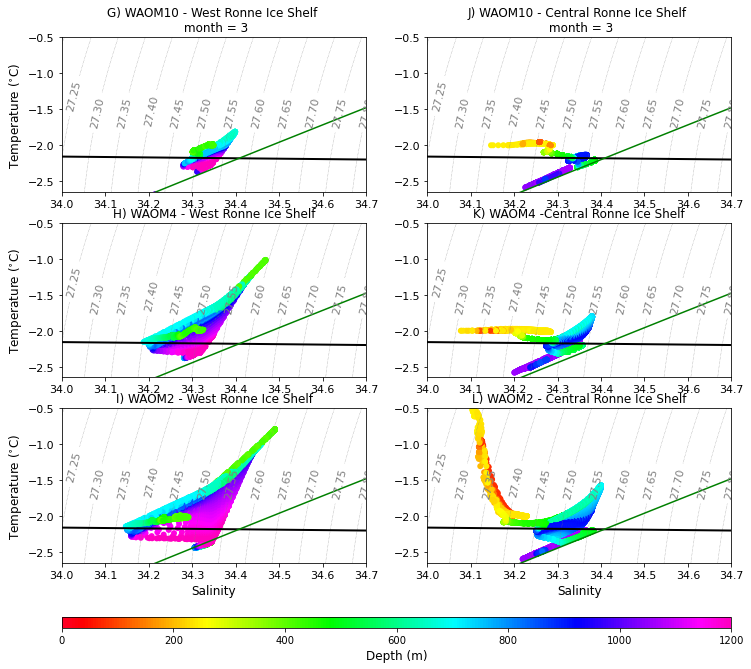

4 25 30


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

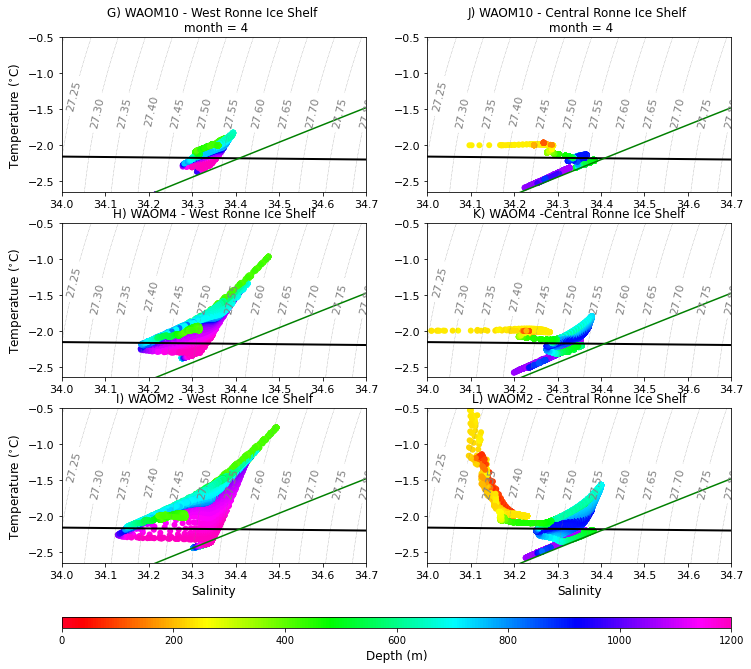

5 31 36


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

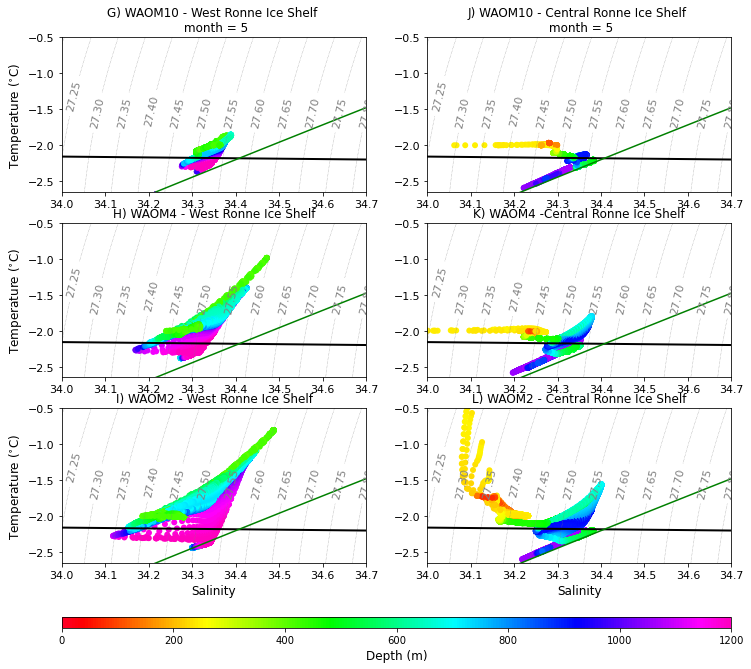

6 37 42


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: UserWarning: No contour levels were found within the data range.
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ir

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

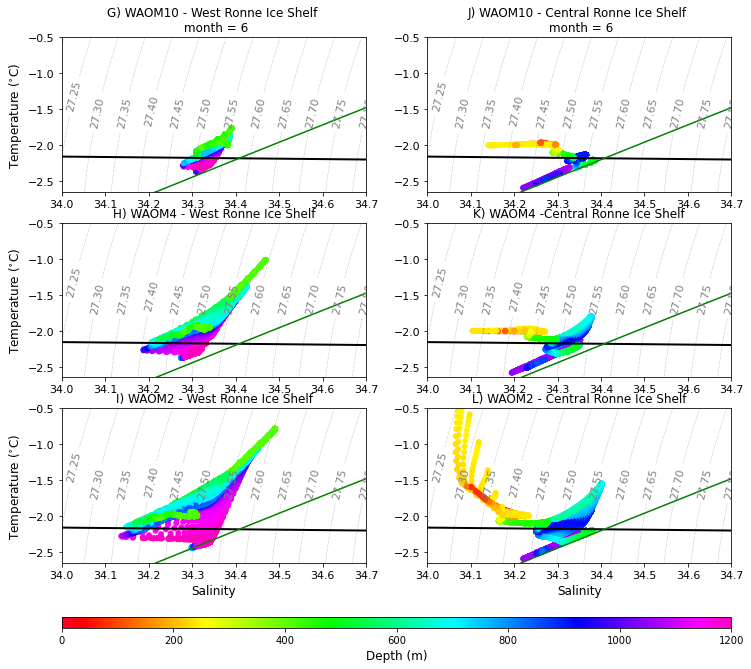

7 43 48


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

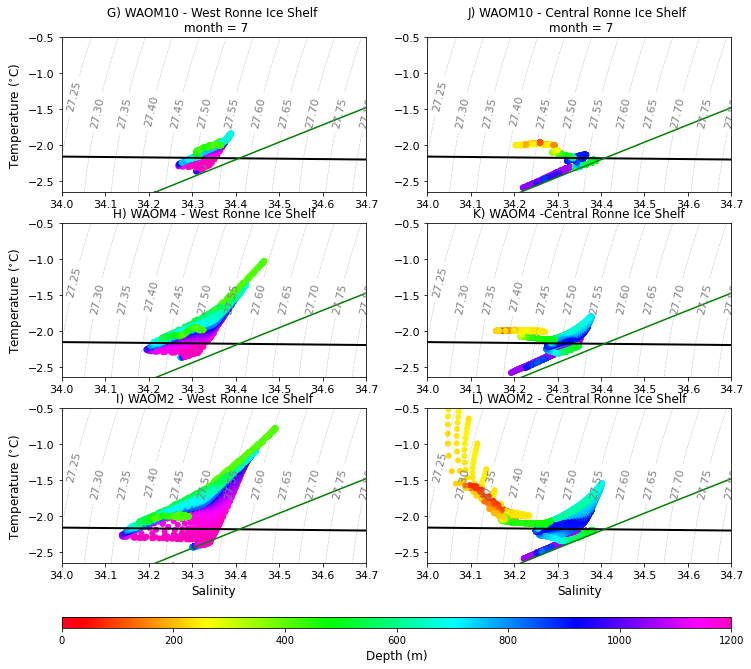

8 49 54


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iri

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: UserWarning: No contour levels were found within the data range.
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

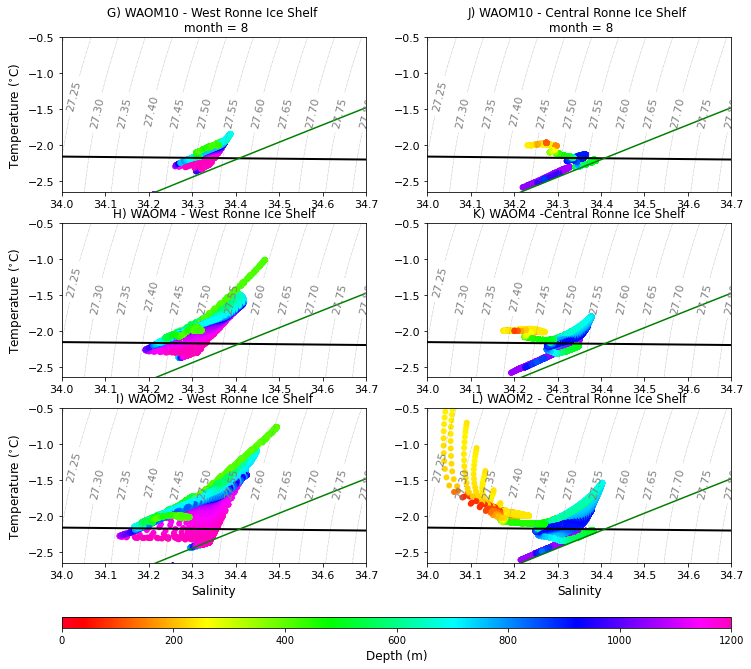

9 55 60


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:139: UserWarning: No contour levels were found within the data range.


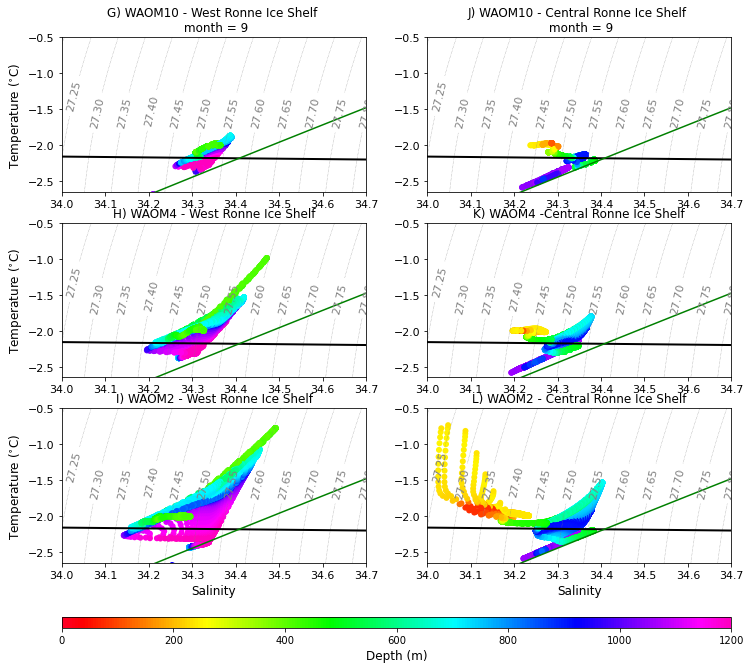

10 61 66


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

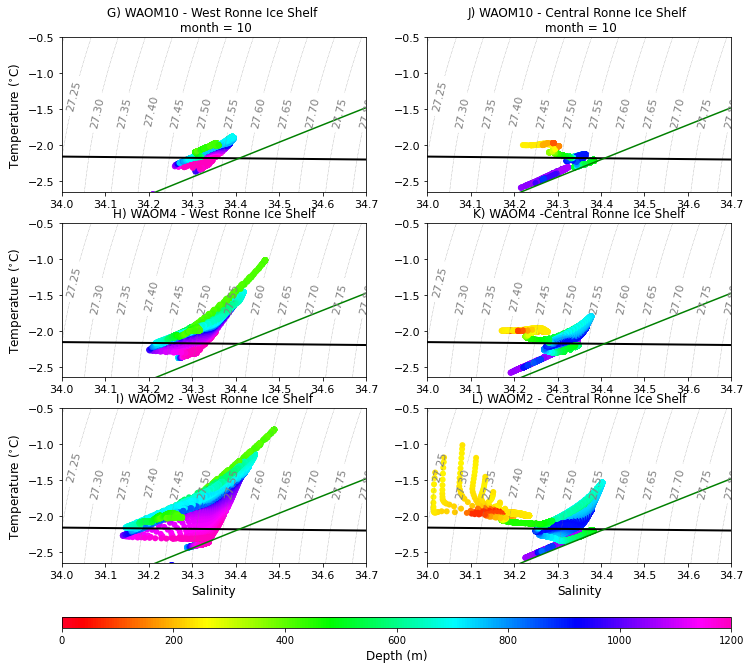

11 67 73


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1976: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'time-averaged free-surface'.
  warnings.warn(msg.format(self.name()))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:119: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(**new_dependencies)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'averaged time since initialization'.

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

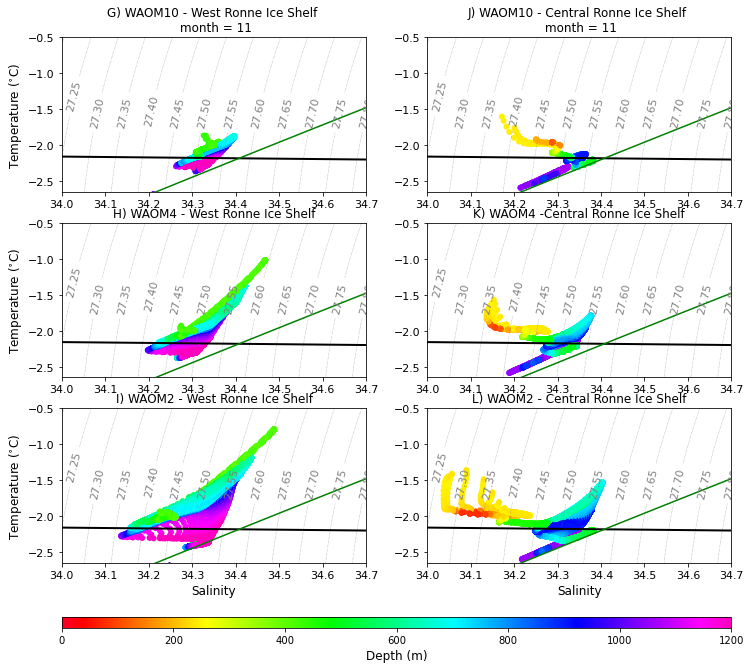

In [16]:
for mm in np.arange(0,12):
    print(mm,int(tind_ini[mm]),int(tind_end[mm]))
    ti = int(tind_ini[mm])
    te = int(tind_end[mm])         

    # ts-diagram
    fig = plt.figure(figsize=(12,10))

    plt.subplot(3,2,1)
    plt.gcf().subplots_adjust(bottom=0.15)

    temp_WWed10_ext = temp_WWed10_tmp[ti:te,:,:]
    temp_WWed10_plot = temp_WWed10_ext.collapsed('averaged time since initialization', iris.analysis.MEAN)
    salt_WWed10_ext = salt_WWed10_tmp[ti:te,:,:]
    salt_WWed10_plot = salt_WWed10_ext.collapsed('averaged time since initialization', iris.analysis.MEAN)
    temp_WWed4_ext = temp_WWed4_tmp[ti:te,:,:]
    temp_WWed4_plot = temp_WWed4_ext.collapsed('averaged time since initialization', iris.analysis.MEAN)
    salt_WWed4_ext = salt_WWed4_tmp[ti:te,:,:]
    salt_WWed4_plot = salt_WWed4_ext.collapsed('averaged time since initialization', iris.analysis.MEAN)
    temp_WWed2_ext = temp_WWed2_tmp[ti:te,:,:]
    temp_WWed2_plot = temp_WWed2_ext.collapsed('averaged time since initialization', iris.analysis.MEAN)
    salt_WWed2_ext = salt_WWed2_tmp[ti:te,:,:]
    salt_WWed2_plot = salt_WWed2_ext.collapsed('averaged time since initialization', iris.analysis.MEAN)
#     temp_WWed2_plot = temp_WWed2_tmp[mm,:,:]
#     salt_WWed2_plot = salt_WWed2_tmp[mm,:,:]
    
    for s, t in iris.iterate.izip(salt_WWed10_plot, temp_WWed10_plot, coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_WWed10, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
    ax = plt.gca()
    ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=12)
    ax.set_xlim([34,34.7])
    ax.set_ylim([-2.65,-.5])
    plt.title('G) WAOM10 - West Ronne Ice Shelf \n month = ' + str(mm))
    ax.tick_params(labelsize=11)
    CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
    cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
    plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
    plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
    # plt.plot(si,Tgade,'-',color='brown')
    plt.plot(si,Tgade2,'-',color='green')

    plt.subplot(3,2,3)
    plt.gcf().subplots_adjust(bottom=0.15)

    for s, t in iris.iterate.izip(salt_WWed4_plot, temp_WWed4_plot, coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_WWed4, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
    ax = plt.gca()
    ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=12)
    ax.set_xlim([34,34.7])
    ax.set_ylim([-2.65,-.5])
    plt.title('H) WAOM4 - West Ronne Ice Shelf')
    ax.tick_params(labelsize=11)
    CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
    cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
    plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
    plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
    # plt.plot(si,Tgade,'-',color='brown')
    plt.plot(si,Tgade2,'-',color='green')

    plt.subplot(3,2,5)
    plt.gcf().subplots_adjust(bottom=0.15)

    for s, t in iris.iterate.izip(salt_WWed2_plot, temp_WWed2_plot, coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_WWed2, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
    ax = plt.gca()
    ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=12)
    ax.set_xlabel('Salinity',fontsize=12)
    ax.set_xlim([34,34.7])
    ax.set_ylim([-2.65,-.5])
    plt.title('I) WAOM2 - West Ronne Ice Shelf')
    ax.tick_params(labelsize=11)
    CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
    cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
    plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
    plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
    # plt.plot(si,Tgade,'-',color='brown')
    plt.plot(si,Tgade2,'-',color='green')

    plt.subplot(3,2,2)
    plt.gcf().subplots_adjust(bottom=0.15)
    
    temp_EWed10_ext = temp_EWed10_tmp[ti:te,:,:]
    temp_EWed10_plot = temp_EWed10_ext.collapsed('averaged time since initialization', iris.analysis.MEAN)
    salt_EWed10_ext = salt_EWed10_tmp[ti:te,:,:]
    salt_EWed10_plot = salt_EWed10_ext.collapsed('averaged time since initialization', iris.analysis.MEAN)
    temp_EWed4_ext = temp_EWed4_tmp[ti:te,:,:]
    temp_EWed4_plot = temp_EWed4_ext.collapsed('averaged time since initialization', iris.analysis.MEAN)
    salt_EWed4_ext = salt_EWed4_tmp[ti:te,:,:]
    salt_EWed4_plot = salt_EWed4_ext.collapsed('averaged time since initialization', iris.analysis.MEAN)
    temp_EWed2_plot = temp_EWed2_tmp[mm,:,:]
    salt_EWed2_plot = salt_EWed2_tmp[mm,:,:]

    for s, t in iris.iterate.izip(salt_EWed10_plot, temp_EWed10_plot, coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_EWed10, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
    ax = plt.gca()
    # ax.set_ylabel('Temperature ($^{\circ}$C)')
    ax.set_xlim([34,34.7])
    ax.set_ylim([-2.65,-.5])
    plt.title('J) WAOM10 - Central Ronne Ice Shelf \n month = ' + str(mm))
    ax.tick_params(labelsize=11)
    CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
    cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
    plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
    plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
    # plt.plot(si,Tgade,'-',color='brown')
    plt.plot(si,Tgade2,'-',color='green')

    plt.subplot(3,2,4)
    plt.gcf().subplots_adjust(bottom=0.15)

    for s, t in iris.iterate.izip(salt_EWed4_plot, temp_EWed4_plot, coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_EWed4, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
    ax = plt.gca()
    # ax.set_ylabel('Temperature ($^{\circ}$C)')
    ax.set_xlim([34,34.7])
    ax.set_ylim([-2.65,-.5])
    plt.title('K) WAOM4 -Central Ronne Ice Shelf')
    ax.tick_params(labelsize=11)
    CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
    cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
    plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
    plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
    # plt.plot(si,Tgade,'-',color='brown')
    plt.plot(si,Tgade2,'-',color='green')

    plt.subplot(3,2,6)
    plt.gcf().subplots_adjust(bottom=0.15)

    for s, t in iris.iterate.izip(salt_EWed2_plot, temp_EWed2_plot, coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_EWed2, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=1200)
    ax = plt.gca()
    # ax.set_ylabel('Temperature ($^{\circ}$C)')
    ax.set_xlabel('Salinity',fontsize=12)
    ax.set_xlim([34,34.7])
    ax.set_ylim([-2.65,-.5])
    plt.title('L) WAOM2 - Central Ronne Ice Shelf')
    ax.tick_params(labelsize=11)
    CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
    cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
    plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
    plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
    # plt.plot(si,Tgade,'-',color='brown')
    plt.plot(si,Tgade2,'-',color='green')

    cbar_ax2 = fig.add_axes([0.125, 0.06, 0.775, 0.015])
    cbts = fig.colorbar(scat, cax=cbar_ax2, orientation='horizontal')
    cbts.ax.set_xlabel('Depth (m)',fontsize=12)

    fig_path='/users/boeiradi/COLD_project/postprocessing/figs/TS_diagrams/'
    name_fig="waom10x4x2extend_shflim_S_0.25Q_RFIS_TSdiag_iceshelf_m" + str(mm) + ".png"
    plt.savefig(fig_path + name_fig, dpi=300)
    plt.show()

In [17]:
# Hovmoller with salt & temperature anomalies for each transect over time (12 months)


In [18]:
# WAOM10
lat_WWed10_mm = np.ones((73,69))
for ii in np.arange(0,73):
    lat_WWed10_mm[ii,:] = lat_WWed10_tmp
lat_WWed10_mm_mask =  ma.array(lat_WWed10_mm,mask=np.isnan(lat_WWed10_mm))

months_WWed10 = np.empty(lat_WWed10_mm_mask.shape)
for ll in np.arange(0,69):
    months_WWed10[:,ll] = np.arange(1,12,0.151)
    
lat_EWed10_mm = np.ones((73,64))
for ii in np.arange(0,73):
    lat_EWed10_mm[ii,:] = lat_EWed10_tmp
lat_EWed10_mm_mask =  ma.array(lat_EWed10_mm,mask=np.isnan(lat_EWed10_mm))

months_EWed10 = np.empty(lat_EWed10_mm_mask.shape)
for ll in np.arange(0,64):
    months_EWed10[:,ll] = np.arange(1,12,0.151)

In [19]:
print(np.arange(1,12,0.151).shape)

(73,)


In [20]:
# WAOM4
lat_WWed4_mm = np.ones((73,173))
for ii in np.arange(0,73):
    lat_WWed4_mm[ii,:] = lat_WWed4_tmp
lat_WWed4_mm_mask =  ma.array(lat_WWed4_mm,mask=np.isnan(lat_WWed4_mm))

months_WWed4 = np.empty(lat_WWed4_mm_mask.shape)
for ll in np.arange(0,173):
    months_WWed4[:,ll] = np.arange(1,12,0.151)
    
lat_EWed4_mm = np.ones((73,160))
for ii in np.arange(0,73):
    lat_EWed4_mm[ii,:] = lat_EWed4_tmp
lat_EWed4_mm_mask =  ma.array(lat_EWed4_mm,mask=np.isnan(lat_EWed4_mm))

months_EWed4 = np.empty(lat_EWed4_mm_mask.shape)
for ll in np.arange(0,160):
    months_EWed4[:,ll] = np.arange(1,12,0.151)

In [21]:
# WAOM2

lat_WWed2_mm = np.ones((72,345))
for ii in np.arange(0,72):
    lat_WWed2_mm[ii,:] = lat_WWed2_tmp
lat_WWed2_mm_mask =  ma.array(lat_WWed2_mm,mask=np.isnan(lat_WWed2_mm))

months_WWed2 = np.empty(lat_WWed2_mm_mask.shape)
for ll in np.arange(0,345):
    months_WWed2[:,ll] = np.arange(1,12,0.153)
    
lat_EWed2_mm = np.ones((72,320))
for ii in np.arange(0,72):
    lat_EWed2_mm[ii,:] = lat_EWed2_tmp
lat_EWed2_mm_mask =  ma.array(lat_EWed2_mm,mask=np.isnan(lat_EWed2_mm))

months_EWed2 = np.empty(lat_EWed2_mm_mask.shape)
for ll in np.arange(0,320):
    months_EWed2[:,ll] = np.arange(1,12,0.153)

In [22]:
print(lat_WWed2_mm_mask.shape,months_WWed2.shape,temp_WWed2_xr.isel(s_rho=0).shape)

(72, 345) (72, 345) (72, 345)


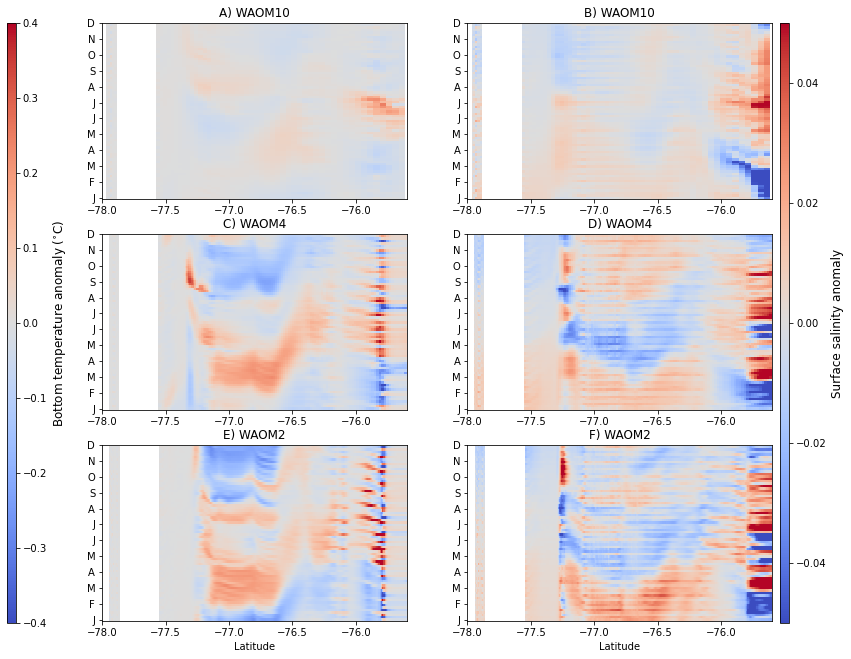

In [41]:
# Hovmollers plots
fig = plt.figure(figsize=(12,10))

plt.title('West Ronne IS')

plt.subplot(3,2,1)
# plt.title('Bottom temperature anomaly \n A) WAOM10')
plt.title('A) WAOM10')
tbar = plt.pcolormesh(lat_WWed10_mm_mask,months_WWed10,temp_WWed10_xr.isel(s_rho=0)-temp_WWed10_xr.isel(s_rho=0).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.4,.4])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim([-78.,-75.6])

plt.subplot(3,2,3)
plt.title('C) WAOM4')
plt.pcolormesh(lat_WWed4_mm_mask,months_WWed4,temp_WWed4_xr.isel(s_rho=0)-temp_WWed4_xr.isel(s_rho=0).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.4,.4])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim([-78.,-75.6])

plt.subplot(3,2,5)
plt.title('E) WAOM2')
plt.pcolormesh(lat_WWed2_mm_mask,months_WWed2,temp_WWed2_xr.isel(s_rho=0)-temp_WWed2_xr.isel(s_rho=0).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.4,.4])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlabel('Latitude')
plt.xlim([-78.,-75.6])

plt.subplot(3,2,2)
# plt.title('Surface salinity anomaly \n B) WAOM10')
plt.title('B) WAOM10')
sbar = plt.pcolormesh(lat_WWed10_mm_mask,months_WWed10,salt_WWed10_xr.isel(s_rho=-1)-salt_WWed10_xr.isel(s_rho=-1).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.05,.05])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim([-78.,-75.6])

plt.subplot(3,2,4)
plt.title('D) WAOM4')
plt.pcolormesh(lat_WWed4_mm_mask,months_WWed4,salt_WWed4_xr.isel(s_rho=-1)-salt_WWed4_xr.isel(s_rho=-1).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.05,.05])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim([-78.,-75.6])

plt.subplot(3,2,6)
plt.title('F) WAOM2')
plt.pcolormesh(lat_WWed2_mm_mask,months_WWed2,salt_WWed2_xr.isel(s_rho=-1)-salt_WWed2_xr.isel(s_rho=-1).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.05,.05])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlabel('Latitude')
plt.xlim([-78.,-75.6])

plt.gcf().subplots_adjust(bottom=0.05)

# cbar_ax1 = fig.add_axes([0.124, -0.025, 0.355, 0.015])
cbar_ax1 = fig.add_axes([0.015, 0.047, 0.01, 0.833])
cbtt = fig.colorbar(tbar, cax=cbar_ax1, orientation='vertical') #'horizontal')
cbtt.ax.set_ylabel('Bottom temperature anomaly ($^{\circ}$C)',fontsize=12)

# cbar_ax2 = fig.add_axes([0.55, -0.025, 0.355, 0.015])
cbar_ax2 = fig.add_axes([0.91, 0.047, 0.01, 0.833])
cbts = fig.colorbar(sbar, cax=cbar_ax2, orientation='vertical') #'horizontal')
cbts.ax.set_ylabel('Surface salinity anomaly',fontsize=12)
    
fig_path='/users/boeiradi/COLD_project/postprocessing/figs/Hovmollers/'
name_fig="waom10x4x2extend_shflim_S_0.25Q_West-RFISsection_Hovmoller.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

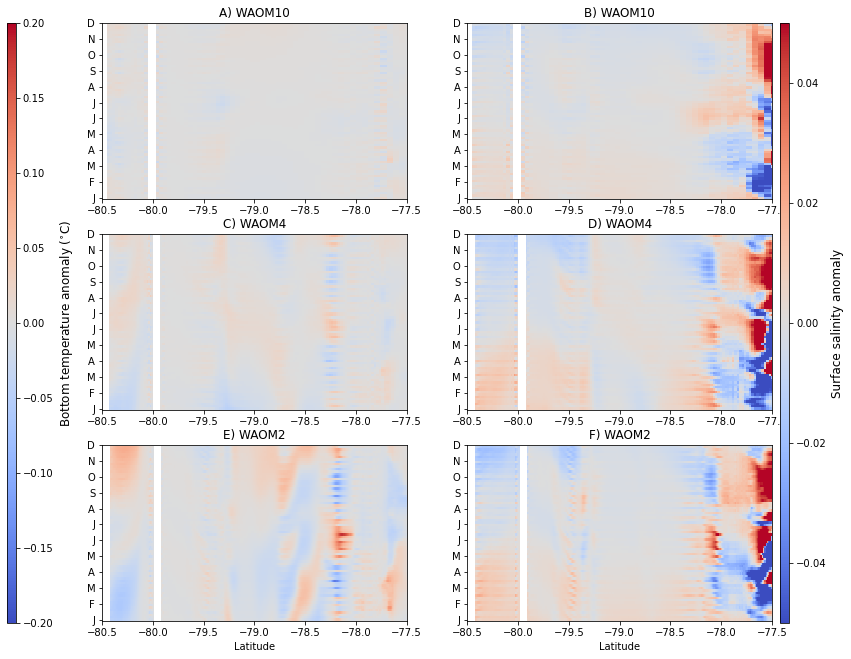

In [42]:
# ts-diagram
fig = plt.figure(figsize=(12,10))

plt.title('West Ronne IS')

plt.subplot(3,2,1)
plt.title('A) WAOM10')
tbar = plt.pcolormesh(lat_EWed10_mm_mask,months_EWed10,temp_EWed10_xr.isel(s_rho=0)-temp_EWed10_xr.isel(s_rho=0).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.2,.2])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim([-80.5,-77.5])

plt.subplot(3,2,3)
plt.title('C) WAOM4')
plt.pcolormesh(lat_EWed4_mm_mask,months_EWed4,temp_EWed4_xr.isel(s_rho=0)-temp_EWed4_xr.isel(s_rho=0).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.2,.2])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim([-80.5,-77.5])

plt.subplot(3,2,5)
plt.title('E) WAOM2')
plt.pcolormesh(lat_EWed2_mm_mask,months_EWed2,temp_EWed2_xr.isel(s_rho=0)-temp_EWed2_xr.isel(s_rho=0).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.2,.2])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlabel('Latitude')
plt.xlim([-80.5,-77.5])

plt.subplot(3,2,2)
plt.title('B) WAOM10')
sbar = plt.pcolormesh(lat_EWed10_mm_mask,months_EWed10,salt_EWed10_xr.isel(s_rho=-1)-salt_EWed10_xr.isel(s_rho=-1).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.05,.05])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim([-80.5,-77.5])

plt.subplot(3,2,4)
plt.title('D) WAOM4')
plt.pcolormesh(lat_EWed4_mm_mask,months_EWed4,salt_EWed4_xr.isel(s_rho=-1)-salt_EWed4_xr.isel(s_rho=-1).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.05,.05])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim([-80.5,-77.5])

plt.subplot(3,2,6)
plt.title('F) WAOM2')
plt.pcolormesh(lat_EWed2_mm_mask,months_EWed2,salt_EWed2_xr.isel(s_rho=-1)-salt_EWed2_xr.isel(s_rho=-1).mean('ocean_time'), cmap=plt.cm.coolwarm)
plt.clim([-.05,.05])
plt.yticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlabel('Latitude')
plt.xlim([-80.5,-77.5])

plt.gcf().subplots_adjust(bottom=0.05)

# cbar_ax1 = fig.add_axes([0.124, -0.025, 0.355, 0.015])
cbar_ax1 = fig.add_axes([0.015, 0.047, 0.01, 0.833])
cbtt = fig.colorbar(tbar, cax=cbar_ax1, orientation='vertical') #'horizontal')
cbtt.ax.set_ylabel('Bottom temperature anomaly ($^{\circ}$C)',fontsize=12)

# cbar_ax2 = fig.add_axes([0.55, -0.025, 0.355, 0.015])
cbar_ax2 = fig.add_axes([0.91, 0.047, 0.01, 0.833])
cbts = fig.colorbar(sbar, cax=cbar_ax2, orientation='vertical') #'horizontal')
cbts.ax.set_ylabel('Surface salinity anomaly',fontsize=12)

fig_path='/users/boeiradi/COLD_project/postprocessing/figs/Hovmollers/'
name_fig="waom10x4x2extend_shflim_S_0.25Q_East-RFISsection_Hovmoller.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()
